In [25]:
import re
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sidetable

In [26]:
pd.options.display.max_columns=None
# plt.rcParams.update({'font.size': 22})

In [27]:
df_todo = pd.read_csv('../datos/datos_divididos_unos.csv', index_col = 0)

In [28]:
df = df_todo[(df_todo ["job_title"] == "Business Analyst") | (df_todo["job_title"] == "Data Analyst")]

In [29]:
lista_prefijos = ['IDE', 'visualisation', 'big_data', 'BI_tools', 'activities', 'dev_language',  'notebooks', 'sharing']

In [30]:
df.drop(columns = ['IDE', 'visualisation', 'big_data', 'BI_tools', 'work_activities', 'dev_language'], inplace=True)

/var/folders/qs/lczv8kqx5w59ygqwfs1w0vlr0000gn/T/ipykernel_1567/2129907744.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns = ['IDE', 'visualisation', 'big_data', 'BI_tools', 'work_activities', 'dev_language'], inplace=True)


In [31]:
def creacion_subplots(df, lista_prefijos):
    
    diccionario =  {}
    for i in lista_prefijos:
        lista_col = []
        for col in df.columns:
            if i in col:
                lista_col.append(col)

        dataframe_tool = df.loc[:, lista_col[0]: lista_col[-1]].sum(numeric_only=True).reset_index()
        dataframe_tool.columns = [f"{i}", 'number_of_users']
        diccionario[i] = dataframe_tool
    
       
    fig, axes = plt.subplots(4, 2, figsize=(20, 15))
    axes = axes.flatten()
    for n, (key, dataframe) in enumerate(diccionario.items()):
            fig = sns.barplot(y=key, x= 'number_of_users', data=dataframe, order= dataframe.sort_values('number_of_users', ascending= False)[key], ax=axes[n])

            fig.set_title(f'Number of users per {key}') 

            fig.spines[["top", "right"]].set_visible(False)

            fig.set_xticks(ticks = [0, 500, 1000, 1500, 2000, 2500])

    plt.tight_layout()

    plt.show()

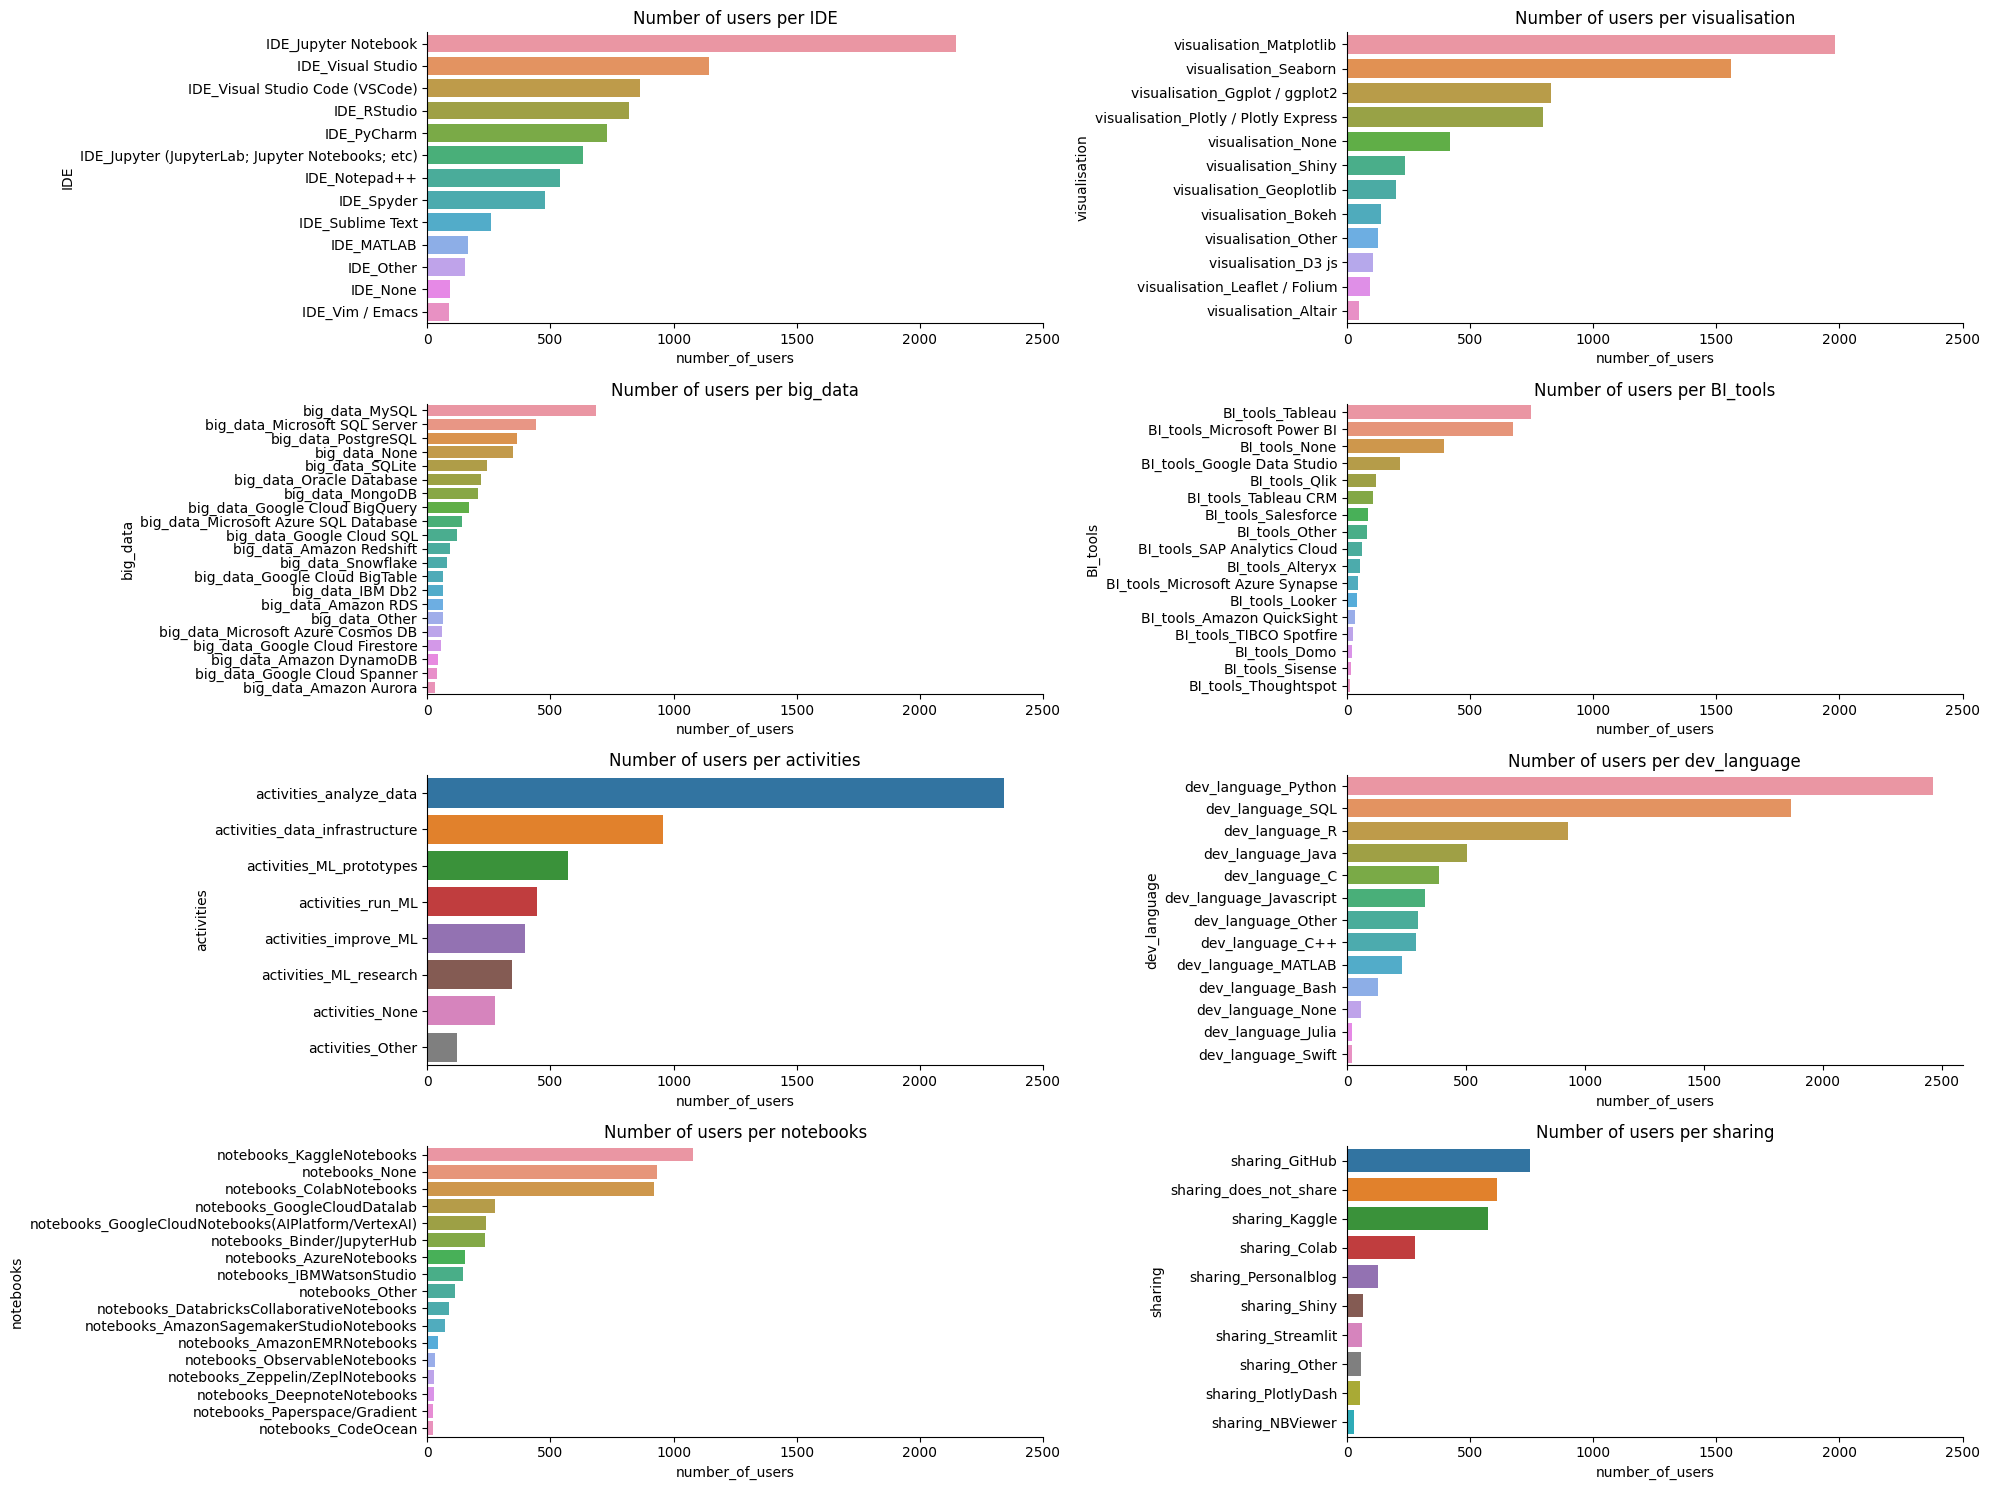

In [32]:
creacion_subplots(df, lista_prefijos)

In [33]:
def creacion_graficas(df, lista_prefijos):
    
    diccionario =  {}
    for i in lista_prefijos:
        lista_col = []
        for col in df.columns:
            if i in col:
                lista_col.append(col)

        dataframe = df.loc[:, lista_col[0]: lista_col[-1]].sum(numeric_only=True).reset_index()
        dataframe.columns = [f"{i}", 'number_of_users']
        diccionario[i] = dataframe
        
        plt.figure(figsize=(20, 10))

        fig=sns.barplot(y=i, x= 'number_of_users', data=diccionario[i], order= diccionario[i].sort_values('number_of_users', ascending= False)[i])

        fig.set_title(f'Number of users per {i} tool') 

        fig.spines[["top", "right"]].set_visible(False)

        fig.set_xticks(ticks = [0, 500, 1000, 1500, 2000, 2500])

        plt.tight_layout()

        plt.show()
        
        #revisar el df_divididos_unos!!!
    
    

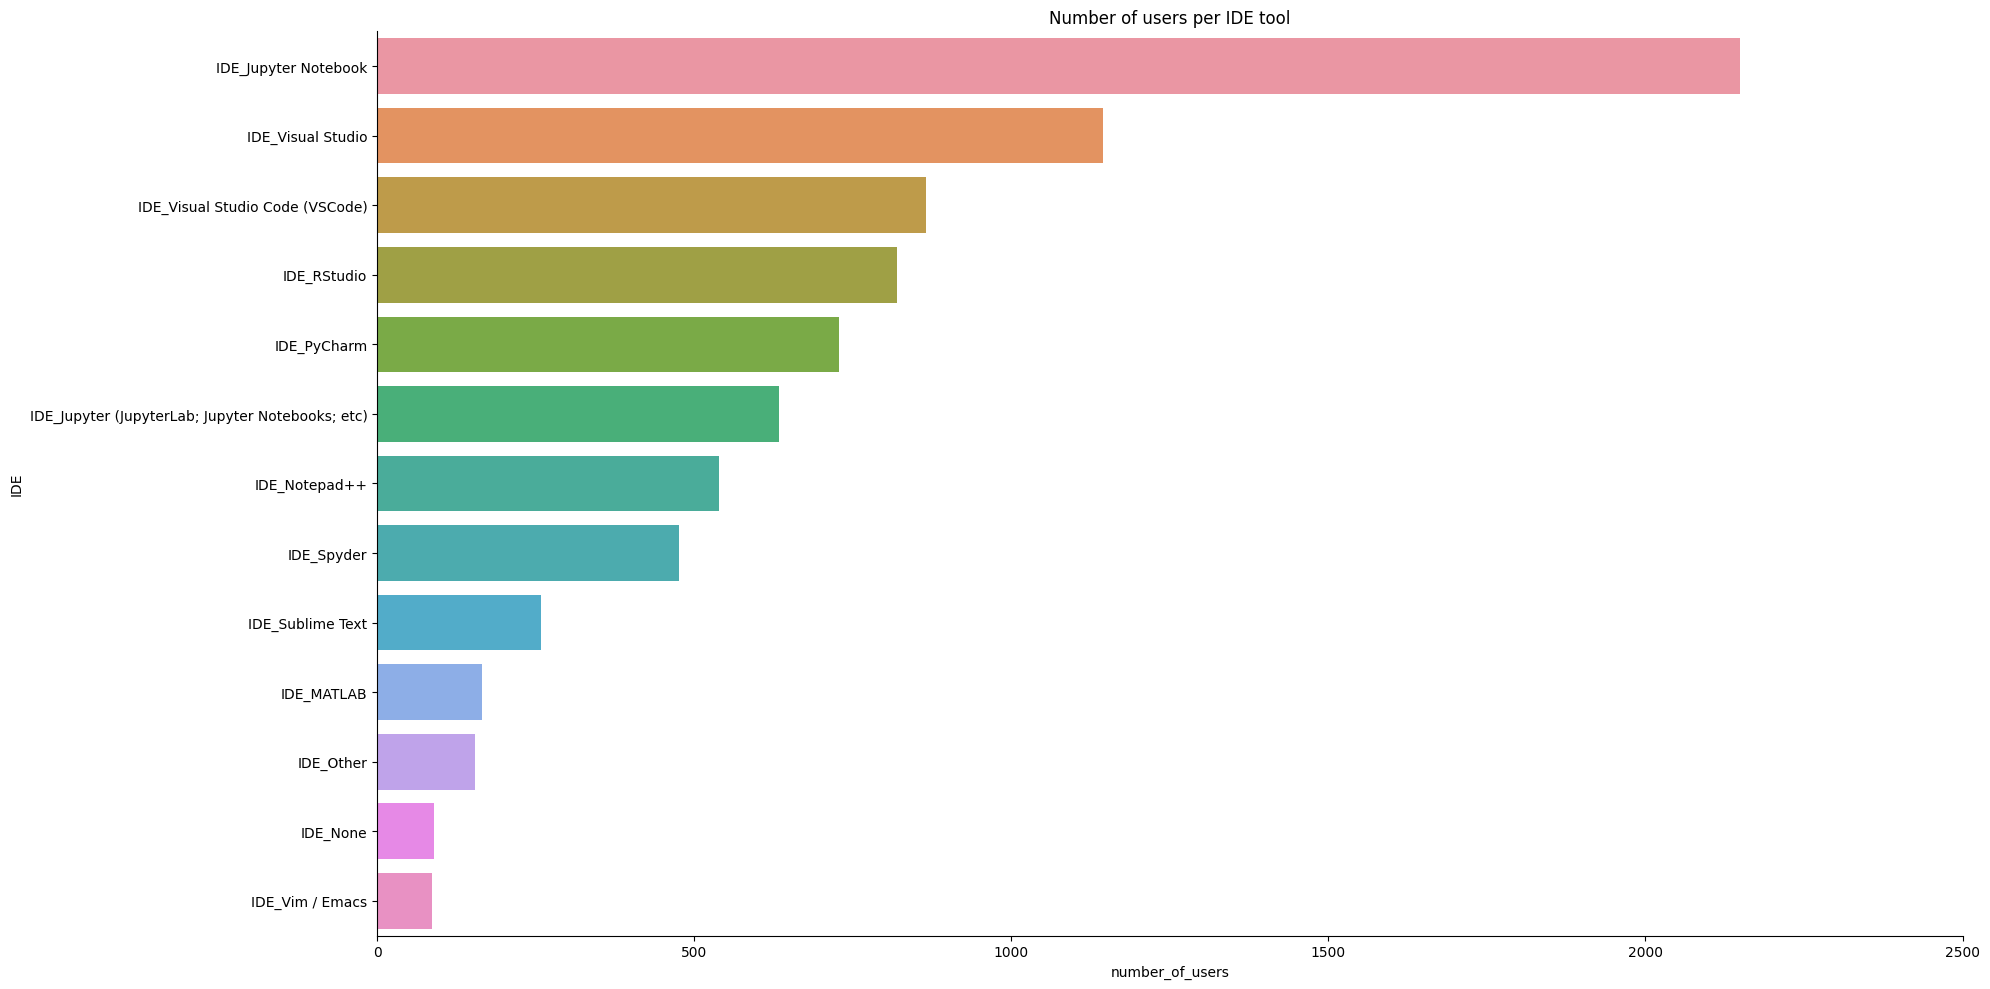

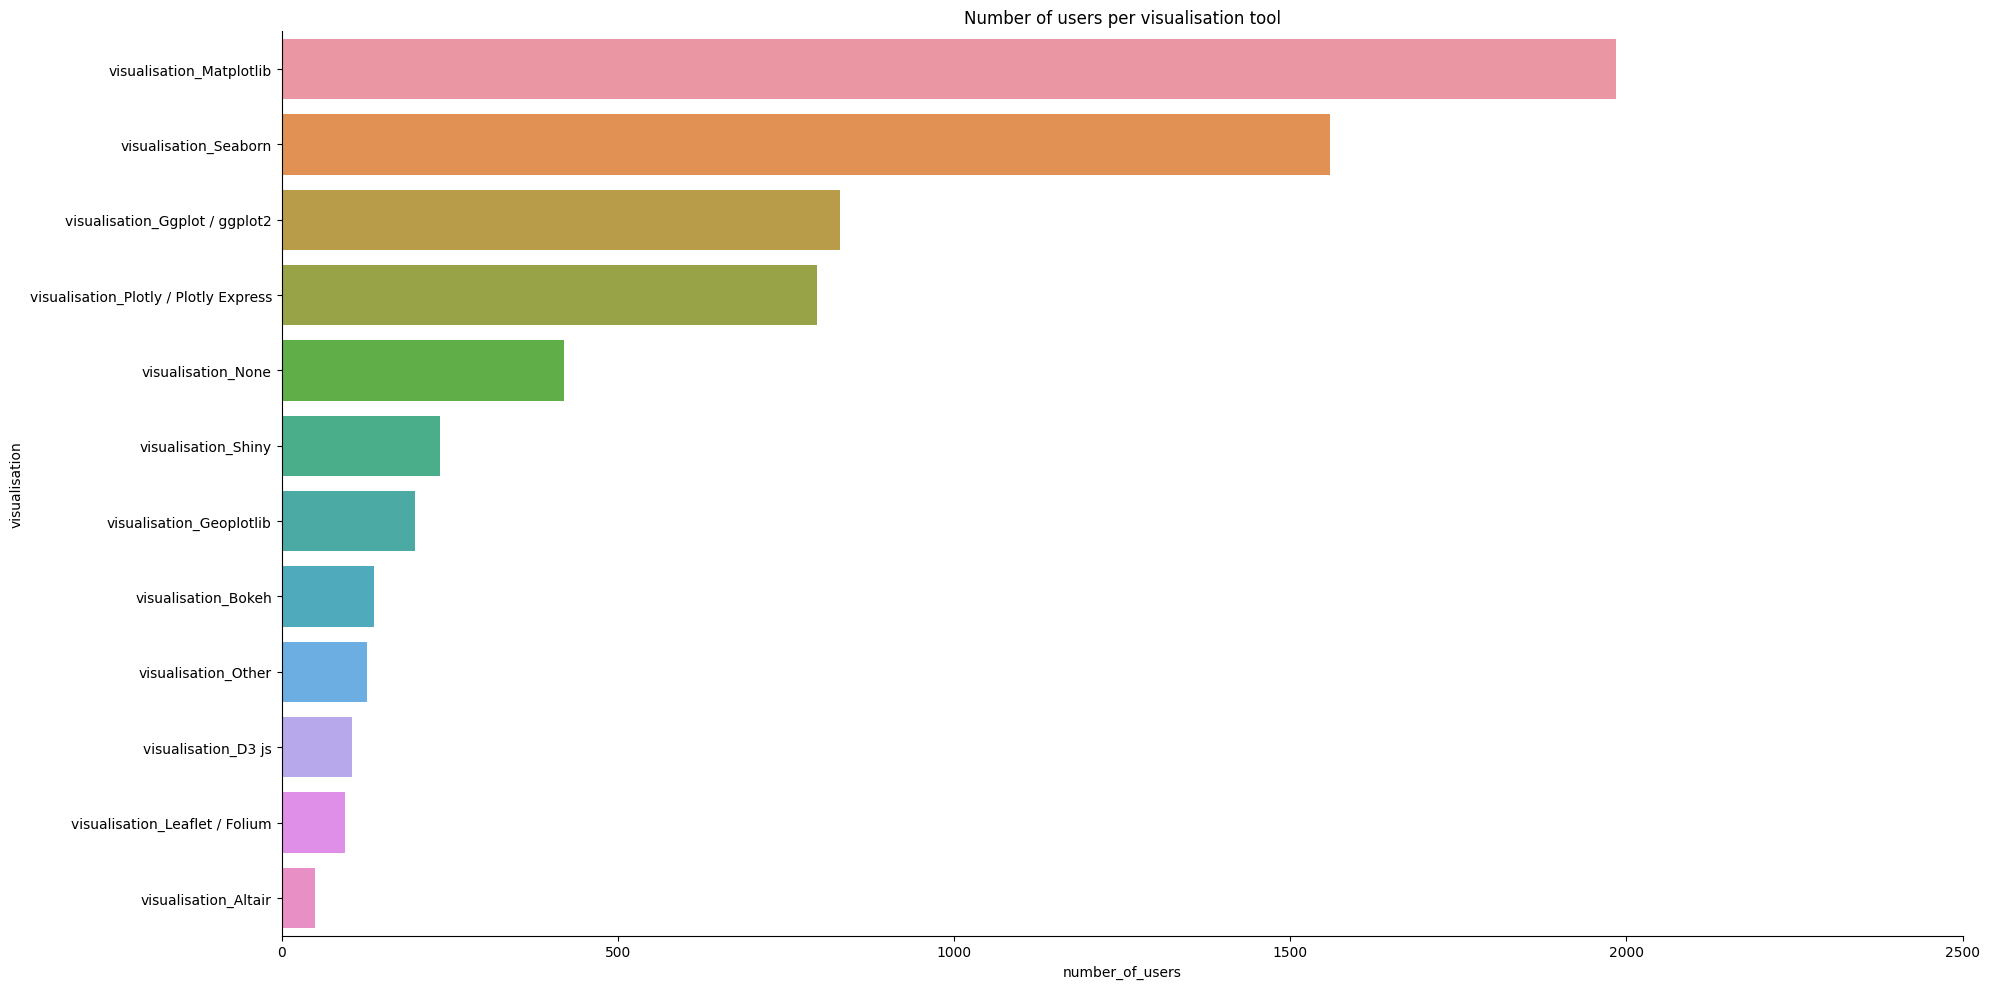

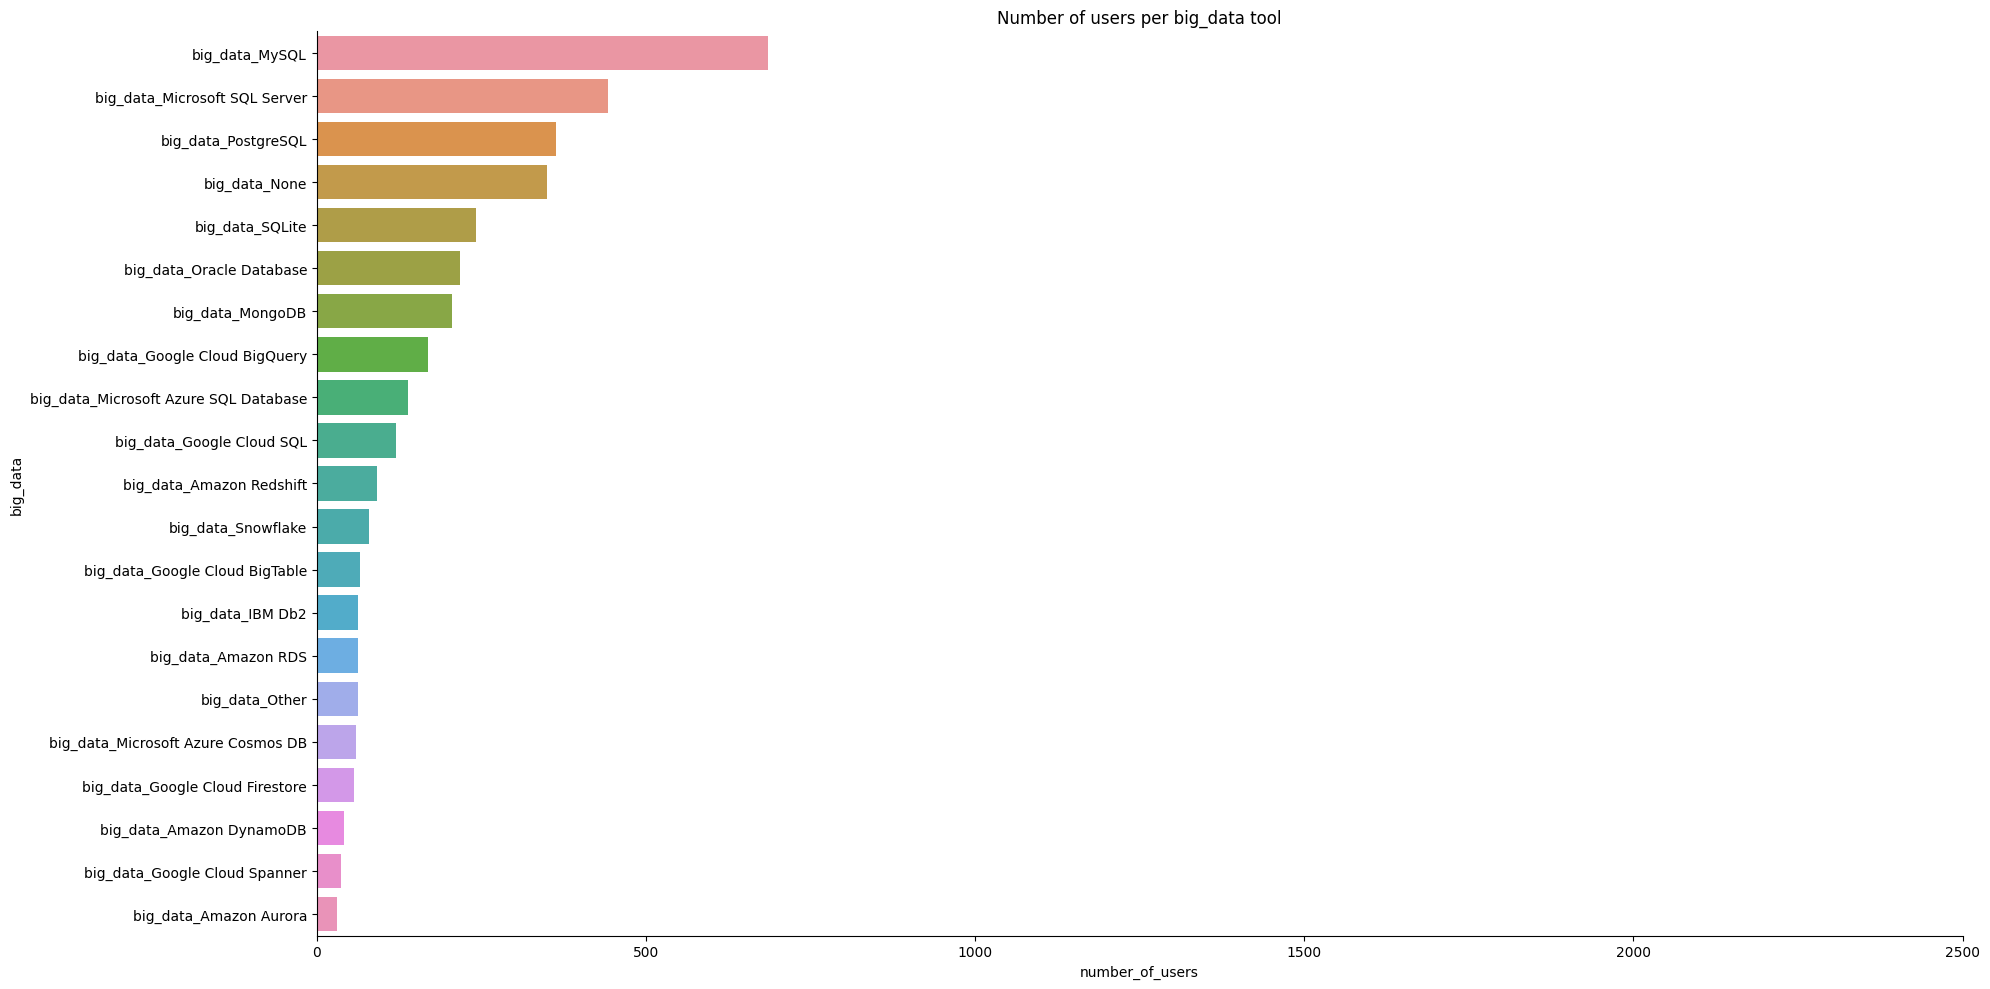

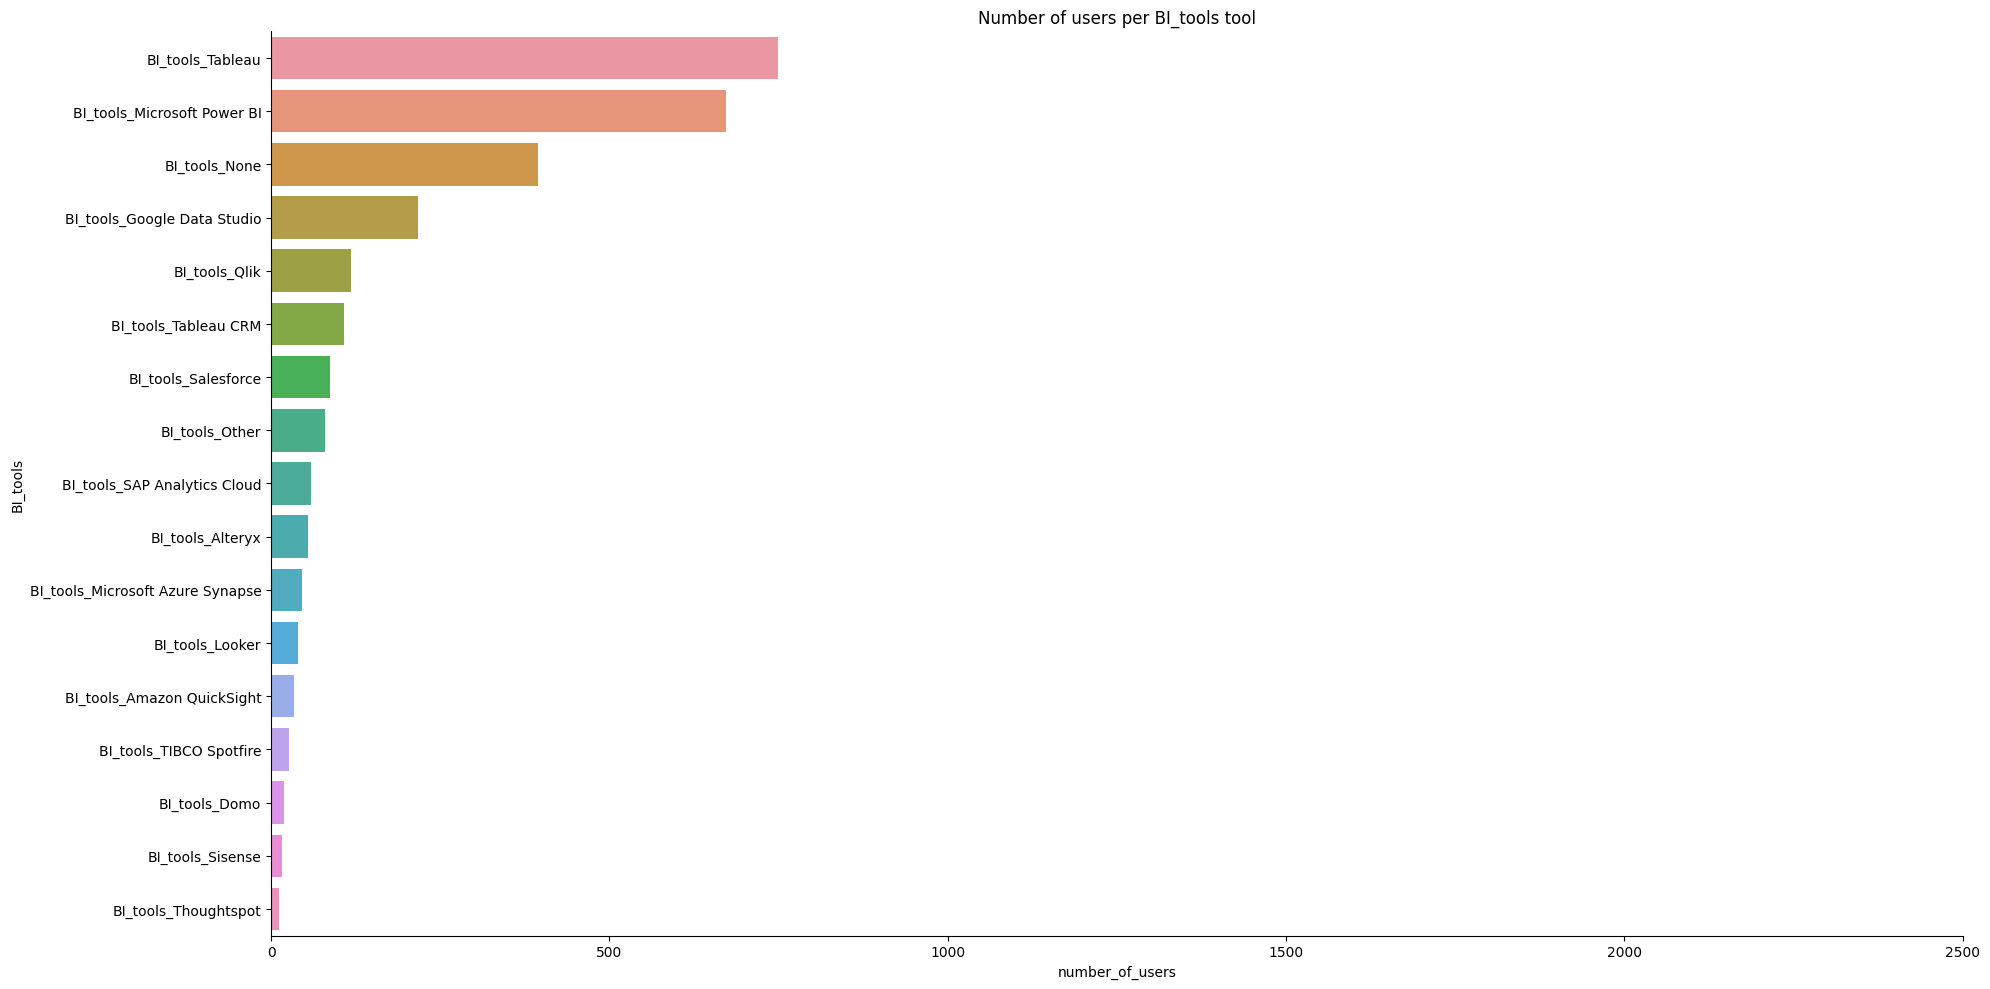

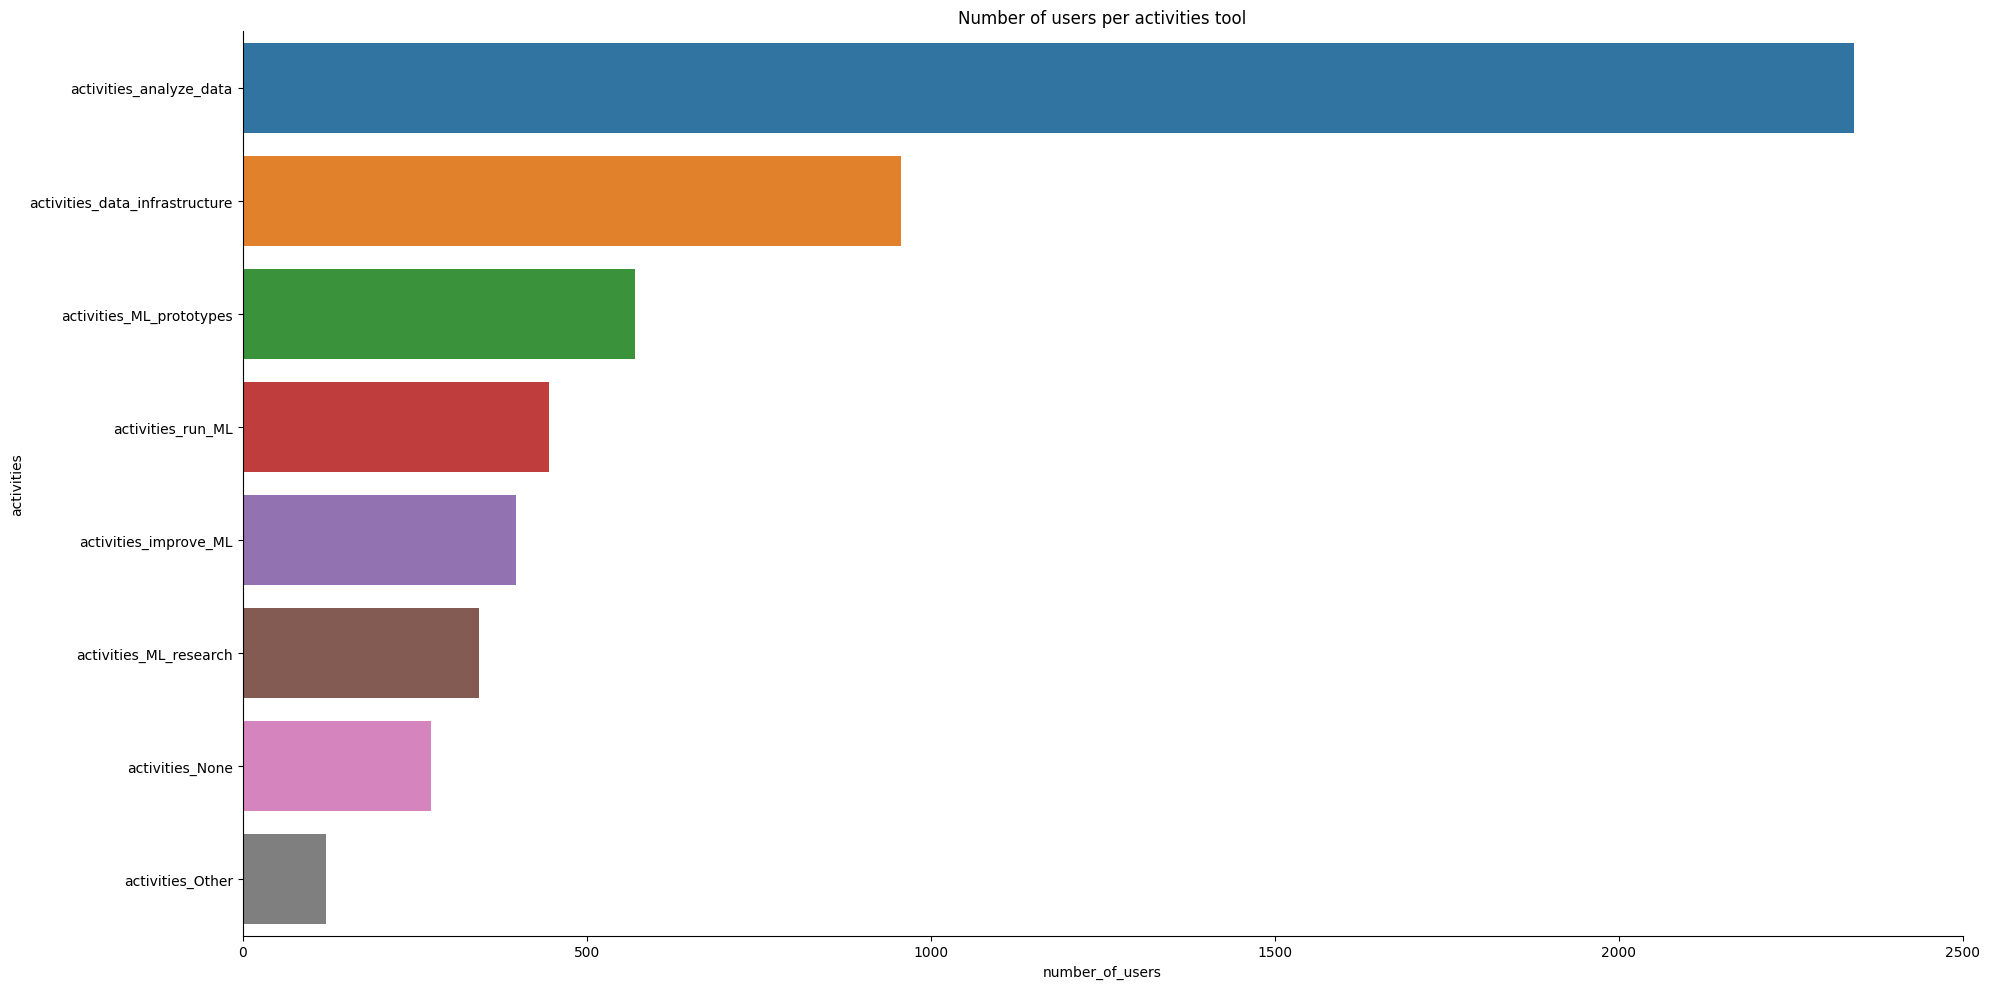

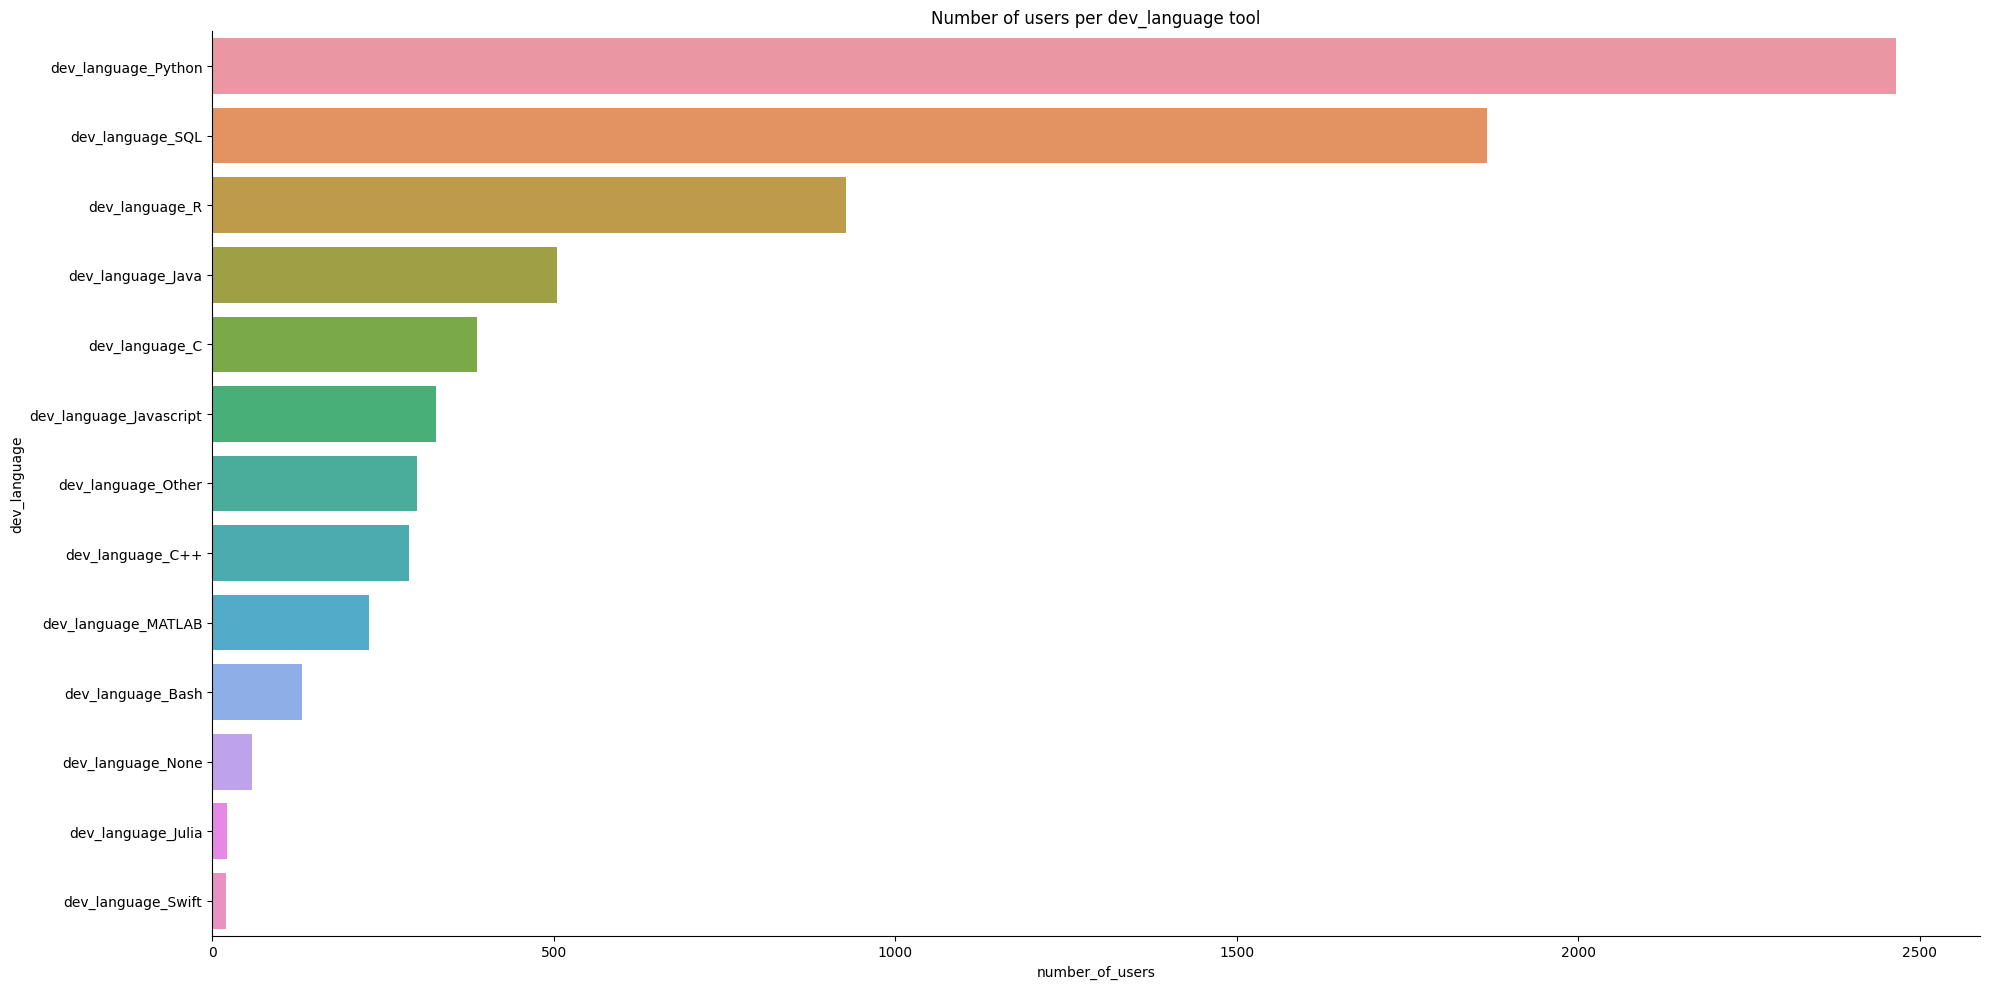

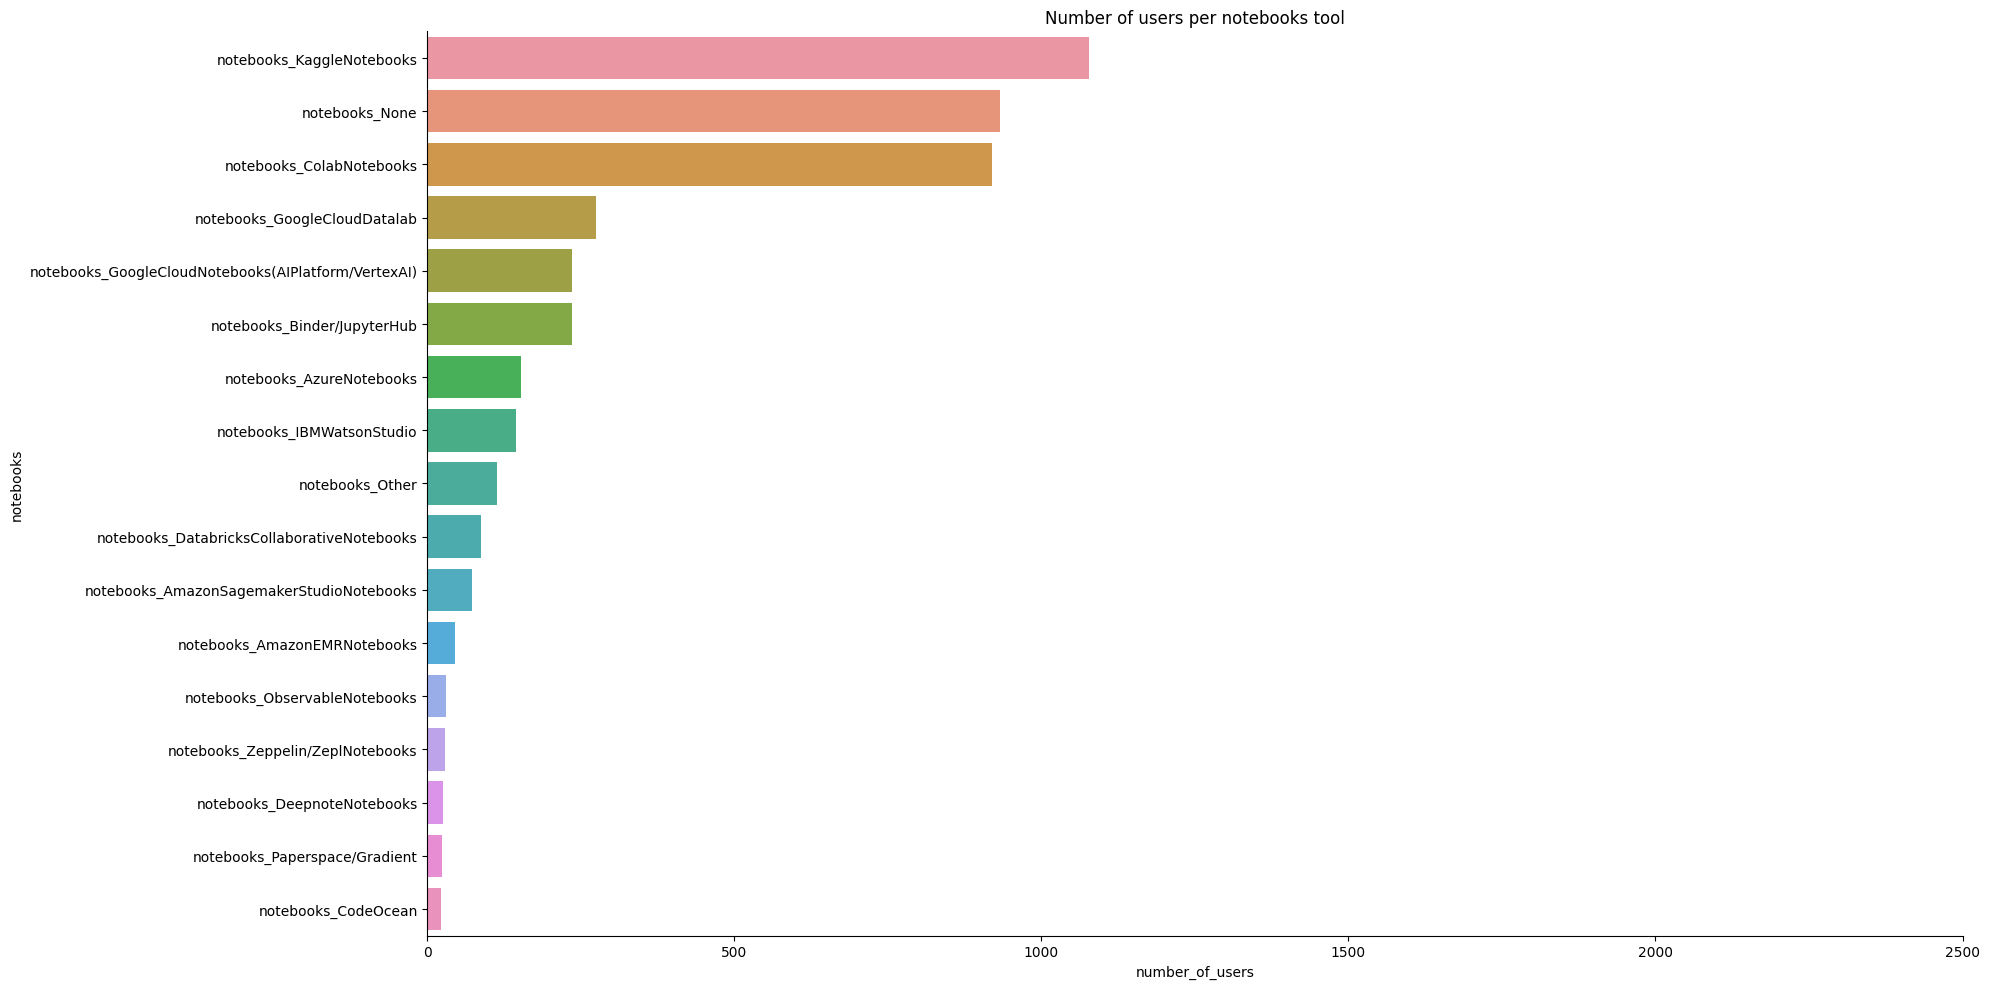

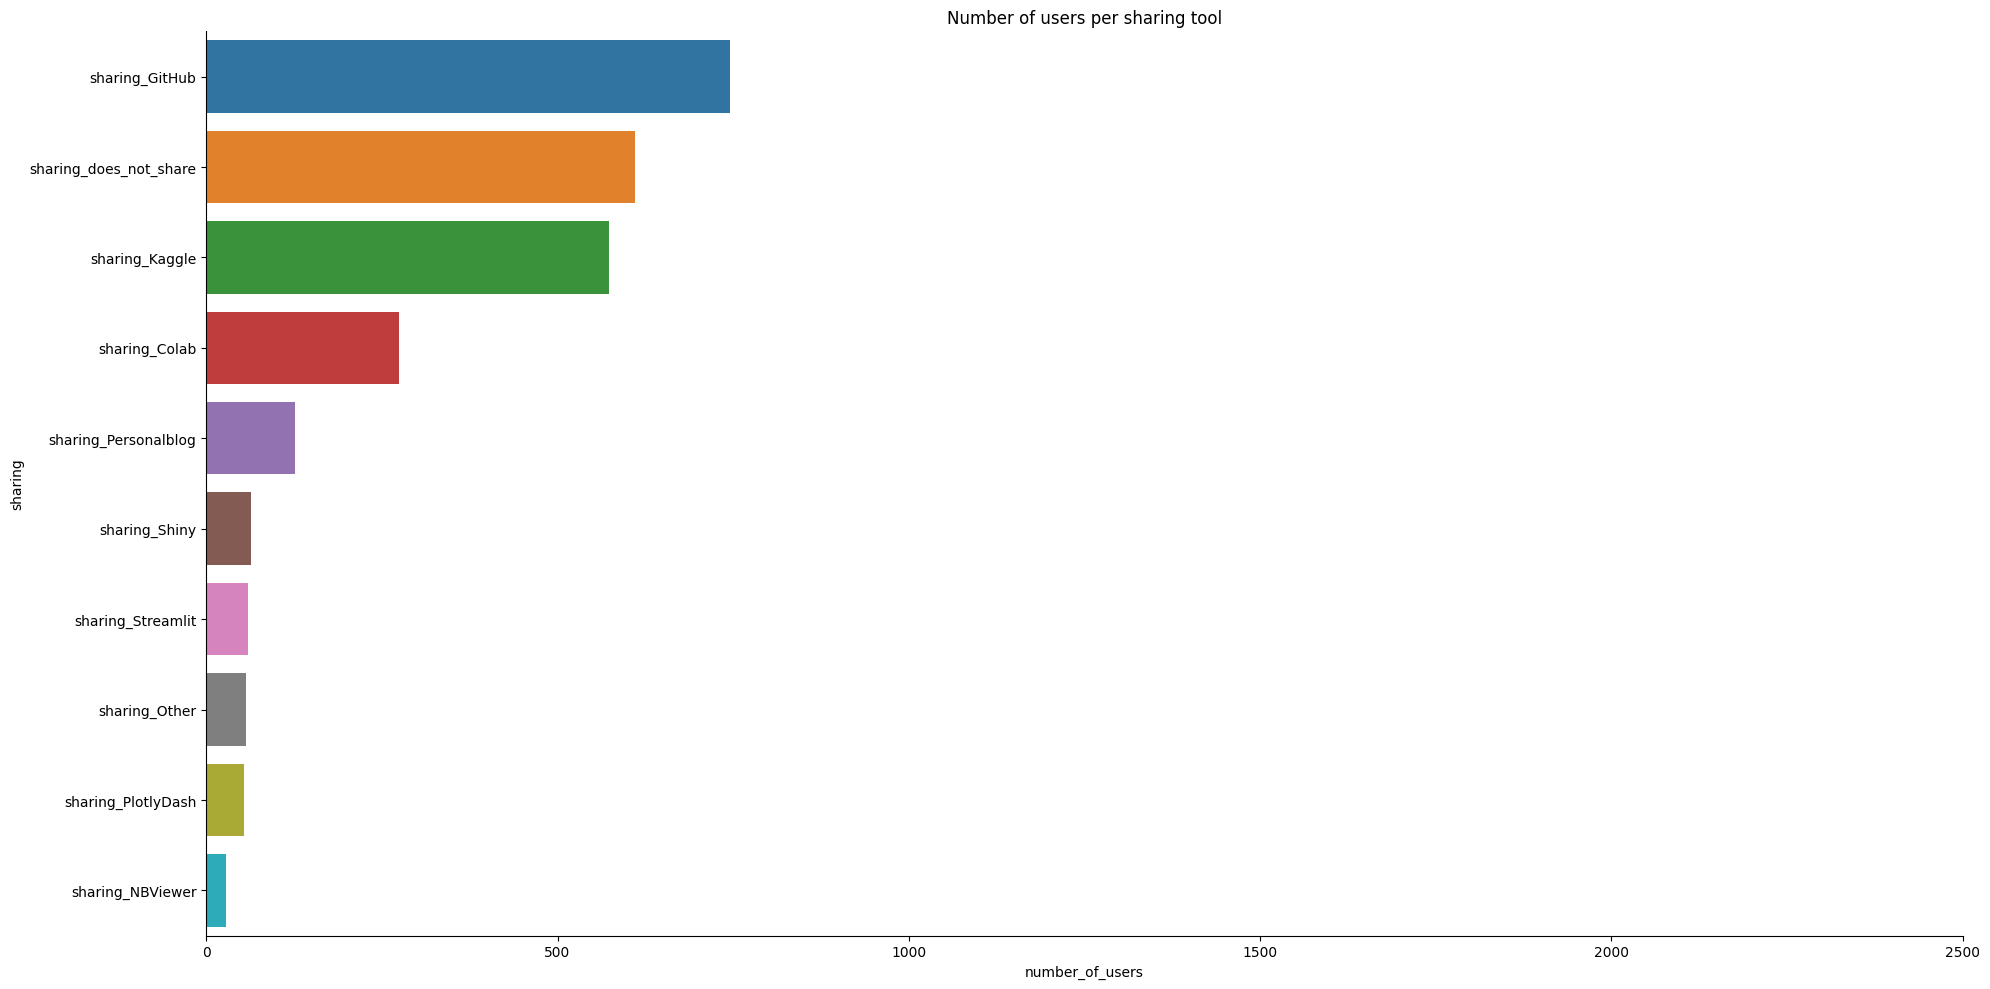

In [34]:
creacion_graficas(df, lista_prefijos)

In [35]:
df_visualisation = df.loc[:, 'visualisation_Matplotlib' : 'visualisation_Other'].sum().reset_index()
df_visualisation.columns = ['visualisation_software', 'number_of_users']
df_visualisation

,visualisation_software,number_of_users
0,visualisation_Matplotlib,1984.0
1,visualisation_Ggplot / ggplot2,830.0
2,visualisation_Other,127.0


ValueError: labels argument cannot be None when kwargs are passed

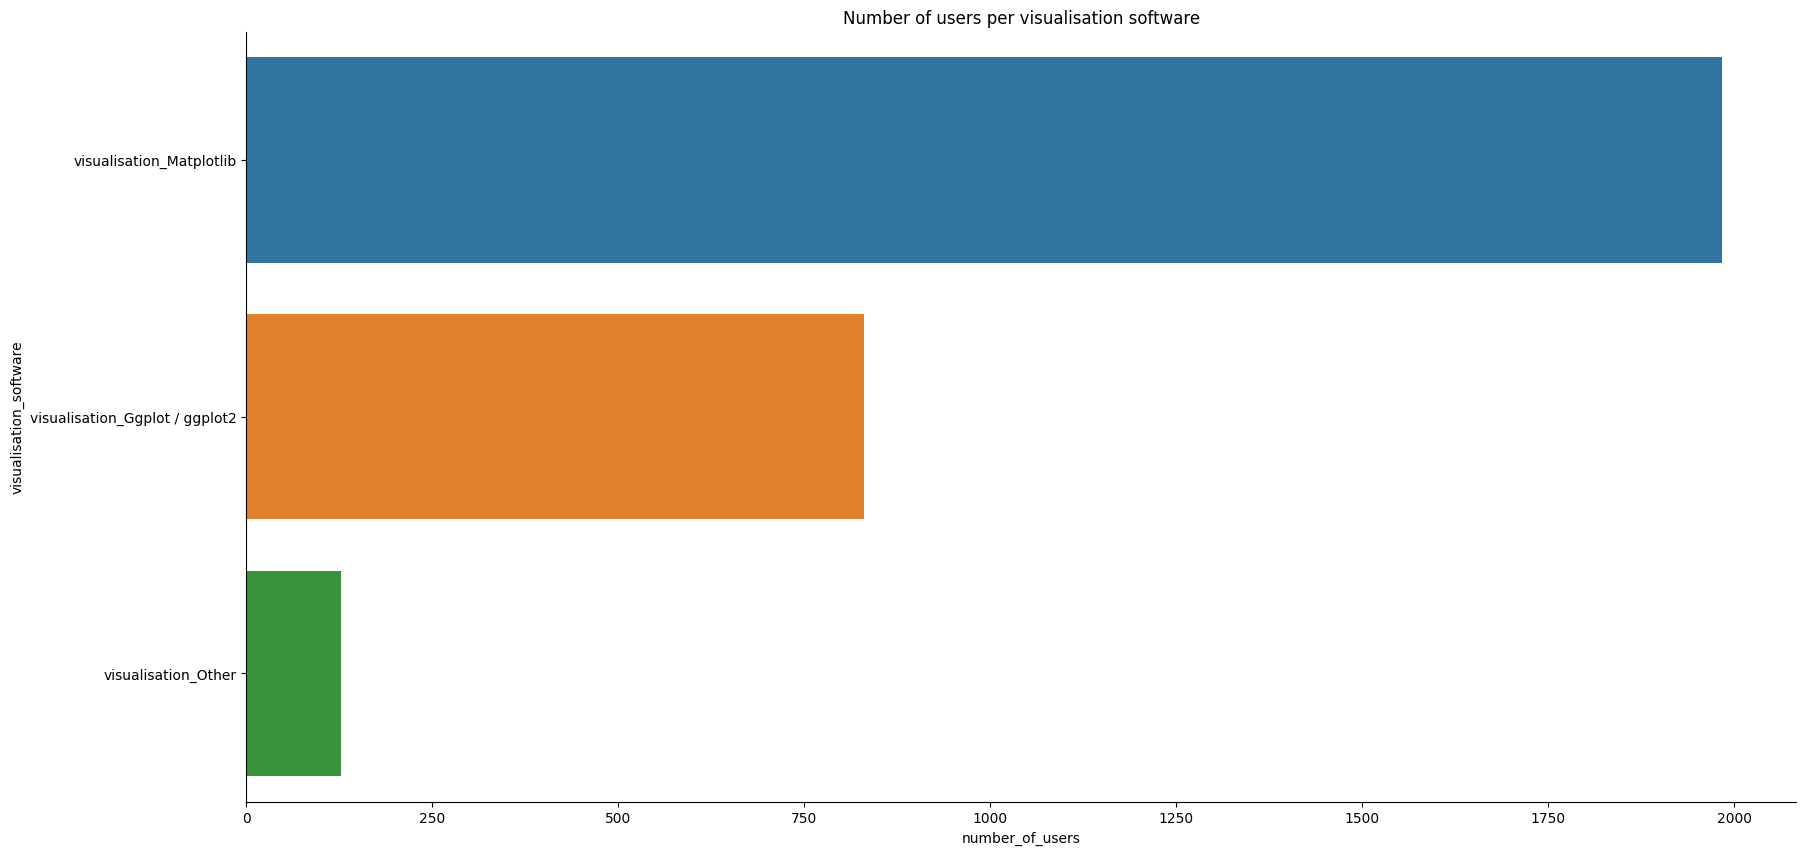

In [36]:
plt.figure(figsize=(20, 10))

fig=sns.barplot(y='visualisation_software', x= 'number_of_users', 
                data=df_visualisation, 
                order= df_visualisation.sort_values('number_of_users', 
                ascending= False)['visualisation_software'])

fig.set_title('Number of users per visualisation software') 

fig.spines[["top", "right"]].set_visible(False)

fig.set_xticks(ticks = [0, 500, 1000, 1500, 2000, 2500], rotation= 45)

# sns.set(font_scale=2)

plt.tight_layout()

plt.show()

In [ ]:
df_notebooks = df.loc[:, 'notebooks_KaggleNotebooks' : 'notebooks_Other'].sum().reset_index()
df_notebooks

/tmp/ipykernel_47080/2409738789.py:1: FutureWarning: The default value of numeric_only in DataFrame.sum is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_notebooks = df.loc[:, 'notebooks_KaggleNotebooks' : 'notebooks_Other'].sum().reset_index()


,index,0


In [ ]:
for i in df.columns:
    print(i)

age
gender
country
continent
job_title
size_DA_dept
years_programming
first_language_rec
primary_data_tool
ML
notebooks_KaggleNotebooks
notebooks_ColabNotebooks
notebooks_AzureNotebooks
notebooks_Paperspace/Gradient
notebooks_Binder/JupyterHub
notebooks_CodeOcean
notebooks_IBMWatsonStudio
notebooks_AmazonSagemakerStudioNotebooks
notebooks_AmazonEMRNotebooks
notebooks_GoogleCloudNotebooks(AIPlatform/VertexAI)
notebooks_GoogleCloudDatalab
notebooks_DatabricksCollaborativeNotebooks
notebooks_Zeppelin/ZeplNotebooks
notebooks_DeepnoteNotebooks
notebooks_ObservableNotebooks
notebooks_None
notebooks_Other
sharing_PlotlyDash
sharing_Streamlit
sharing_NBViewer
sharing_GitHub
sharing_Personalblog
sharing_Kaggle
sharing_Colab
sharing_Shiny
sharing_does_not_share
sharing_Other
dev_language_Python
dev_language_MATLAB
dev_language_Javascript
dev_language_None
dev_language_R
dev_language_Julia
dev_language_C
dev_language_Bash
dev_language_Other
dev_language_Java
dev_language_C++
dev_language_SQL
dev_

In [ ]:
df_work_acts = df.loc[:, 'activities_data_infrastructure' : 'activities_None'].sum().reset_index()
df_work_acts.columns = ['Work Activities', 'Number of Users']
df_work_acts = df_work_acts.sort_values(by='Number of Users', ascending=False)

In [ ]:
df_work_acts

,Work Activities,Number of Users
5,activities_analyze_data,2343.0
0,activities_data_infrastructure,957.0
1,activities_ML_prototypes,571.0
6,activities_run_ML,446.0
4,activities_improve_ML,398.0
2,activities_ML_research,344.0
7,activities_None,274.0
3,activities_Other,121.0


TypeError: set_ticks() got an unexpected keyword argument 'labels'

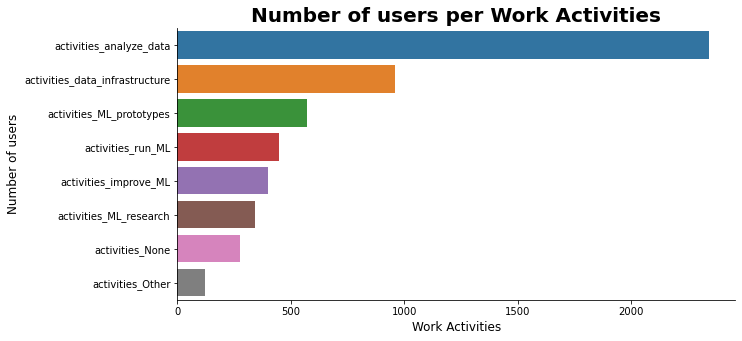

In [ ]:
plt.figure(figsize=(10, 5))

fig=sns.barplot(y='Work Activities', x= 'Number of Users', data=df_work_acts, order= df_work_acts.sort_values('Number of Users', ascending= False)['Work Activities'])

fig.set_title('Number of users per Work Activities', fontsize = 20, fontweight = 'bold') 

fig.spines[["top", "right"]].set_visible(False)

fig.set_xlabel (xlabel = "Work Activities", fontsize = 12)
fig.set_ylabel (ylabel = "Number of users", fontsize = 12)

fig.set_xticks(ticks = [0, 500, 1000, 1500, 2000, 2500], labels = [0, 500, 1000, 1500, 2000, 2500], rotation= 0, fontsize = 15)
fig.set_yticks(ticks = [0, 1, 2, 3, 4, 5, 6, 7], labels = ["Analyze data", "Build/run data infrastructure", "Build ML prototypes", "Build/run ML service", "ML improvement", "ML research", "None", "Other"], rotation = 0, fontsize = 15)

plt.tight_layout()

plt.show()

In [ ]:
df_work_acts['Percentage'] = df_work_acts['Number of Users'] / df_work_acts['Number of Users'].sum() * 100

In [ ]:
df_work_acts

,Work Activities,Number of Users,Percentage
5,activities_analyze_data,2343.0,42.959296
0,activities_data_infrastructure,957.0,17.546755
1,activities_ML_prototypes,571.0,10.469380
6,activities_run_ML,446.0,8.177484
4,activities_improve_ML,398.0,7.297396
2,activities_ML_research,344.0,6.307297
7,activities_None,274.0,5.023836
3,activities_Other,121.0,2.218555


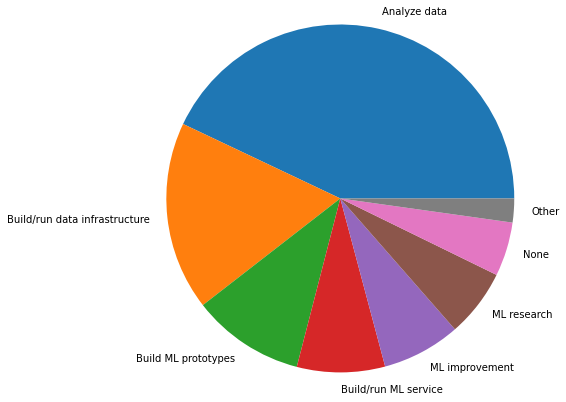

In [ ]:
plt.figure()
plt.pie(df_work_acts['Number of Users'], labels = ["Analyze data", "Build/run data infrastructure", "Build ML prototypes", "Build/run ML service", "ML improvement", "ML research", "None", "Other"], radius = 2)
plt.show()

In [ ]:
condiciones = [(df['years_programming'] == 'I have never written code'), 
                ((df['years_programming'] == '< 1 years')|(df['years_programming'] == '1-3 years')), 
                ((df['years_programming'] == '3-5 years')| (df['years_programming'] == '5-10 years')|(df['years_programming'] == '10-20 years')|(df['years_programming'] == '20+ years'))]
categorias = ['Sin experiencia', 'Junior', 'Senior'] 

In [ ]:
df['programming_experience'] = np.select(condiciones, categorias)

/tmp/ipykernel_3939/3285042291.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['programming_experience'] = np.select(condiciones, categorias)


In [ ]:
df_group_ex = df.groupby('programming_experience').sum()

/tmp/ipykernel_3939/1972931604.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_group_ex = df.groupby('programming_experience').sum()


In [ ]:
df_group_ex

,notebooks_KaggleNotebooks,notebooks_ColabNotebooks,notebooks_AzureNotebooks,notebooks_Paperspace/Gradient,notebooks_Binder/JupyterHub,notebooks_CodeOcean,notebooks_IBMWatsonStudio,notebooks_AmazonSagemakerStudioNotebooks,notebooks_AmazonEMRNotebooks,notebooks_GoogleCloudNotebooks(AIPlatform/VertexAI),notebooks_GoogleCloudDatalab,notebooks_DatabricksCollaborativeNotebooks,notebooks_Zeppelin/ZeplNotebooks,notebooks_DeepnoteNotebooks,notebooks_ObservableNotebooks,notebooks_None,notebooks_Other,sharing_PlotlyDash,sharing_Streamlit,sharing_NBViewer,sharing_GitHub,sharing_Personalblog,sharing_Kaggle,sharing_Colab,sharing_Shiny,sharing_does_not_share,sharing_Other,dev_language_Python,dev_language_MATLAB,dev_language_Javascript,dev_language_None,dev_language_R,dev_language_Julia,dev_language_C,dev_language_Bash,dev_language_Other,dev_language_Java,dev_language_C++,dev_language_SQL,dev_language_Swift,IDE_Jupyter Notebook,IDE_None,IDE_PyCharm,IDE_MATLAB,IDE_RStudio,IDE_Notepad++,IDE_Sublime Text,IDE_Other,IDE_Vim / Emacs,IDE_Spyder,IDE_Visual Studio Code (VSCode),IDE_Visual Studio,IDE_Jupyter (JupyterLab; Jupyter Notebooks; etc),visualisation_D3 js,visualisation_Bokeh,visualisation_None,visualisation_Shiny,visualisation_Seaborn,visualisation_Plotly / Plotly Express,visualisation_Matplotlib,visualisation_Ggplot / ggplot2,visualisation_Other,visualisation_Altair,visualisation_Geoplotlib,visualisation_Leaflet / Folium,activities_data_infrastructure,activities_ML_prototypes,activities_ML_research,activities_Other,activities_improve_ML,activities_analyze_data,activities_run_ML,activities_None,big_data_IBM Db2,big_data_Microsoft SQL Server,big_data_Google Cloud Spanner,big_data_Google Cloud BigTable,big_data_Microsoft Azure Cosmos DB,big_data_Google Cloud BigQuery,big_data_SQLite,big_data_PostgreSQL,big_data_Microsoft Azure SQL Database,big_data_Amazon DynamoDB,big_data_Other,big_data_Oracle Database,big_data_Google Cloud Firestore,big_data_MongoDB,big_data_None,big_data_Amazon RDS,big_data_MySQL,big_data_Amazon Redshift,big_data_Snowflake,big_data_Amazon Aurora,big_data_Google Cloud SQL,BI_tools_Google Data Studio,BI_tools_Qlik,BI_tools_None,BI_tools_Looker,BI_tools_Alteryx,BI_tools_Domo,BI_tools_Other,BI_tools_TIBCO Spotfire,BI_tools_Amazon QuickSight,BI_tools_SAP Analytics Cloud,BI_tools_Thoughtspot,BI_tools_Sisense,BI_tools_Salesforce,BI_tools_Tableau CRM,BI_tools_Microsoft Azure Synapse,BI_tools_Tableau,BI_tools_Microsoft Power BI,primary_tool_local_dev_env,primary_tool_adv_stats,primary_tool_basic_stats,primary_tool_BI,primary_tool_cloud_APIs,primary_tool_Other,first_language_rec_Python,first_language_rec_SQL,first_language_rec_R,first_language_rec_MATLAB,first_language_rec_C,first_language_rec_Julia,first_language_rec_Other,first_language_rec_C++,first_language_rec_Javascript,first_language_rec_Java,first_language_rec_None,first_language_rec_Bash,first_language_rec_Swift
programming_experience,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Junior,678.0,584.0,85.0,17.0,166.0,11.0,98.0,45.0,26.0,145.0,184.0,47.0,18.0,11.0,19.0,550.0,74.0,25.0,30.0,12.0,460.0,66.0,369.0,171.0,26.0,341.0,34.0,1581.0,136.0,154.0,40.0,536.0,8.0,206.0,47.0,111.0,253.0,145.0,1075.0,9.0,1355.0,61.0,479.0,98.0,462.0,246.0,137.0,87.0,23.0,272.0,523.0,690.0,372.0,46.0,66.0,283.0,109.0,973.0,459.0,1253.0,466.0,78.0,27.0,130.0,44.0,523.0,251.0,177.0,64.0,177.0,1313.0,215.0,158.0,28.0,201.0,23.0,38.0,32.0,103.0,125.0,187.0,79.0,19.0,24.0,96.0,28.0,110.0,241.0,23.0,412.0,45.0,35.0,14.0,68.0,126.0,49.0,241.0,18.0,29.0,10.0,37.0,10.0,18.0,35.0,5.0,6.0,49.0,67.0,24.0,462.0,403.0,373.0,90.0,680.0,210.0,34.0,34.0,1400.0,226.0,141.0,10.0,43.0,9.0,14.0,27.0,9.0,27.0,7.0,4.0,0.0
Senior,399.0,336.0,67.0,6.0,69.0,11.0,46.0,28.0,19.0,91.0,90.0,41.0,10.0,15.0,12.0,383.0,39.0,28.0,29.0,16.0,285.0,61.0,204.0,104.0,37.0,269.0,22.0,884.0,94.0,173.0,19.0,392.0,13.0,182.0,84.0,189.0,252.0,143.0,791.0,11

In [38]:
df_tools = df.drop(columns = ['primary_tool_local_dev_env', 
                            'primary_tool_adv_stats', 
                            'primary_tool_basic_stats', 
                            'primary_tool_BI', 
                            'primary_tool_cloud_APIs', 
                            'primary_tool_Other', 
                            'first_language_rec_Python', 
                            'first_language_rec_SQL', 
                            'first_language_rec_R', 
                            'first_language_rec_MATLAB', 
                            'first_language_rec_C', 
                            'first_language_rec_Julia', 
                            'first_language_rec_Other', 
                            'first_language_rec_C++', 
                            'first_language_rec_Javascript', 
                            'first_language_rec_Java', 
                            'first_language_rec_None', 
                            'first_language_rec_Bash', 
                            'first_language_rec_Swift', 
                            'activities_data_infrastructure', 
                            'activities_ML_prototypes', 
                            'activities_ML_research', 
                            'activities_Other', 
                            'activities_improve_ML', 
                            'activities_analyze_data', 
                            'activities_run_ML', 
                            'activities_None',], axis = 1)

In [ ]:
df_tools.head(2)

,age,gender,country,continent,job_title,size_DA_dept,years_programming,first_language_rec,primary_data_tool,ML,notebooks_KaggleNotebooks,notebooks_ColabNotebooks,notebooks_AzureNotebooks,notebooks_Paperspace/Gradient,notebooks_Binder/JupyterHub,notebooks_CodeOcean,notebooks_IBMWatsonStudio,notebooks_AmazonSagemakerStudioNotebooks,notebooks_AmazonEMRNotebooks,notebooks_GoogleCloudNotebooks(AIPlatform/VertexAI),notebooks_GoogleCloudDatalab,notebooks_DatabricksCollaborativeNotebooks,notebooks_Zeppelin/ZeplNotebooks,notebooks_DeepnoteNotebooks,notebooks_ObservableNotebooks,notebooks_None,notebooks_Other,sharing_PlotlyDash,sharing_Streamlit,sharing_NBViewer,sharing_GitHub,sharing_Personalblog,sharing_Kaggle,sharing_Colab,sharing_Shiny,sharing_does_not_share,sharing_Other,dev_language_Python,dev_language_MATLAB,dev_language_Javascript,dev_language_None,dev_language_R,dev_language_Julia,dev_language_C,dev_language_Bash,dev_language_Other,dev_language_Java,dev_language_C++,dev_language_SQL,dev_language_Swift,IDE_Jupyter Notebook,IDE_None,IDE_PyCharm,IDE_MATLAB,IDE_RStudio,IDE_Notepad++,IDE_Sublime Text,IDE_Other,IDE_Vim / Emacs,IDE_Spyder,IDE_Visual Studio Code (VSCode),IDE_Visual Studio,IDE_Jupyter (JupyterLab; Jupyter Notebooks; etc),visualisation_D3 js,visualisation_Bokeh,visualisation_None,visualisation_Shiny,visualisation_Seaborn,visualisation_Plotly / Plotly Express,visualisation_Matplotlib,visualisation_Ggplot / ggplot2,visualisation_Other,visualisation_Altair,visualisation_Geoplotlib,visualisation_Leaflet / Folium,big_data_IBM Db2,big_data_Microsoft SQL Server,big_data_Google Cloud Spanner,big_data_Google Cloud BigTable,big_data_Microsoft Azure Cosmos DB,big_data_Google Cloud BigQuery,big_data_SQLite,big_data_PostgreSQL,big_data_Microsoft Azure SQL Database,big_data_Amazon DynamoDB,big_data_Other,big_data_Oracle Database,big_data_Google Cloud Firestore,big_data_MongoDB,big_data_None,big_data_Amazon RDS,big_data_MySQL,big_data_Amazon Redshift,big_data_Snowflake,big_data_Amazon Aurora,big_data_Google Cloud SQL,BI_tools_Google Data Studio,BI_tools_Qlik,BI_tools_None,BI_tools_Looker,BI_tools_Alteryx,BI_tools_Domo,BI_tools_Other,BI_tools_TIBCO Spotfire,BI_tools_Amazon QuickSight,BI_tools_SAP Analytics Cloud,BI_tools_Thoughtspot,BI_tools_Sisense,BI_tools_Salesforce,BI_tools_Tableau CRM,BI_tools_Microsoft Azure Synapse,BI_tools_Tableau,BI_tools_Microsoft Power BI,programming_experience
16,50-54,Man,Belgium,Europe,Data Analyst,5-9,20+ years,Python,"Local development environments (RStudio, Jupyt...",1-2 years,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Senior
32,22-24,Nonbinary,United States of America,America,Data Analyst,3-4,< 1 years,R,NaN,I do not use machine learning methods,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Junior


In [107]:
df_sum = df_tools.select_dtypes(include=np.number).sum().reset_index()
df_sum.columns = ['tool', 'number_of_users']
df_sum = df_sum.sort_values(by='number_of_users', ascending=False).head(20)

In [109]:
list_sum = df_sum['tool'].to_list()

list_sum

['dev_language_Python',
 'IDE_Jupyter Notebook',
 'visualisation_Matplotlib',
 'dev_language_SQL',
 'visualisation_Seaborn',
 'IDE_Visual Studio',
 'notebooks_KaggleNotebooks',
 'notebooks_None',
 'dev_language_R',
 'notebooks_ColabNotebooks',
 'IDE_Visual Studio Code (VSCode)',
 'visualisation_Ggplot / ggplot2',
 'IDE_RStudio',
 'visualisation_Plotly / Plotly Express',
 'BI_tools_Tableau',
 'sharing_GitHub',
 'IDE_PyCharm',
 'big_data_MySQL',
 'BI_tools_Microsoft Power BI',
 'IDE_Jupyter (JupyterLab; Jupyter Notebooks; etc)']

In [106]:
diccionario_tools = {'dev_language_Python': 'Python',
                    'IDE_Jupyter Notebook': 'Jupyter Notebook',
                    'visualisation_Matplotlib':'Matplotlib',
                    'dev_language_SQL':'SQL',
                    'visualisation_Seaborn':'Seaborn',
                    'IDE_Visual Studio':'Visual Studio',
                    'notebooks_KaggleNotebooks':'Kaggle Notebooks',
                    'notebooks_None':'None',
                    'dev_language_R':'R',
                    'notebooks_ColabNotebooks':'ColabNotebooks',
                    'IDE_Visual Studio Code (VSCode)':'VSCode',
                    'visualisation_Ggplot / ggplot2':'Ggplot / ggplot2',
                    'IDE_RStudio':'RStudio',
                    'visualisation_Plotly / Plotly Express':'Plotly / Plotly Express',
                    'BI_tools_Tableau':'Tableau'}

In [41]:
for k, v in diccionario_tools.items():
    df_sum.replace(to_replace = k, value = v, inplace=True)

In [42]:
df_sum['Percentage'] = round((df_sum['number_of_users'] / df.shape[0] * 100), 0)

In [43]:
df_sum

,tool,number_of_users,Percentage
27,Python,2465.0,75.0
40,Jupyter Notebook,2149.0,66.0
59,Matplotlib,1984.0,61.0
38,SQL,1866.0,57.0
57,Seaborn,1559.0,48.0
51,Visual Studio,1144.0,35.0
0,Kaggle Notebooks,1077.0,33.0
15,None,933.0,29.0
31,R,928.0,28.0
1,ColabNotebooks,920.0,28.0


In [44]:
lista_top_30 = df_sum['tool'].values.tolist()

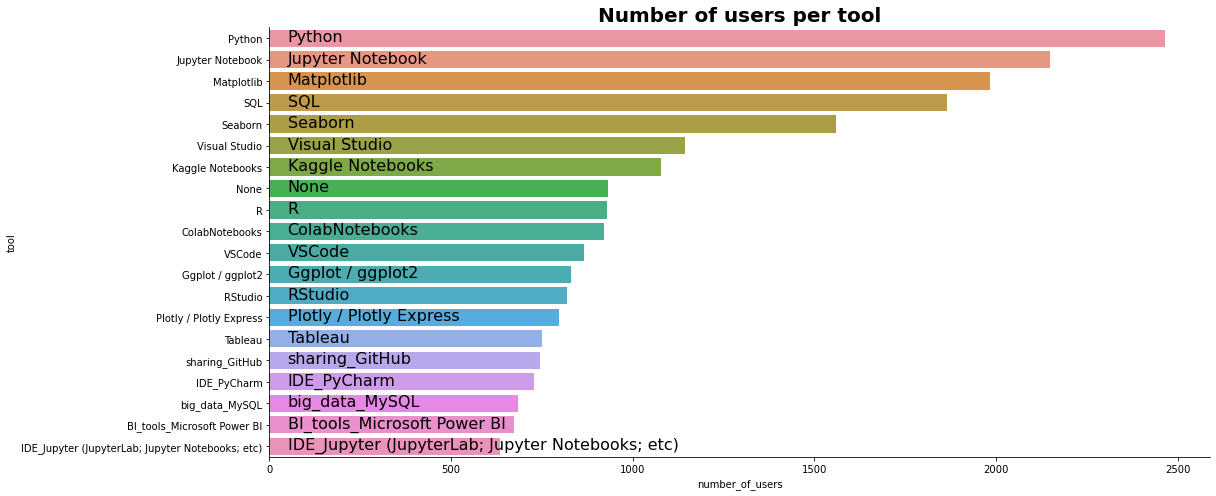

In [ ]:
plt.figure(figsize=(17, 7))

fig=sns.barplot(y = 'tool', x = 'number_of_users', data=df_sum, order= df_sum.sort_values('number_of_users', ascending= False)['tool'])

fig.set_title('Number of users per tool', fontsize = 20, fontweight = 'bold') 

fig.spines[["top", "right"]].set_visible(False)

# para poner etiquetas encima de las barras
for indice, valor in enumerate(df_sum["tool"]):
    plt.text(50, indice+0.15, valor,
             horizontalalignment='left', # para colocarlo en el centro de la barra
             fontsize= 16) 


plt.tight_layout()

plt.show()

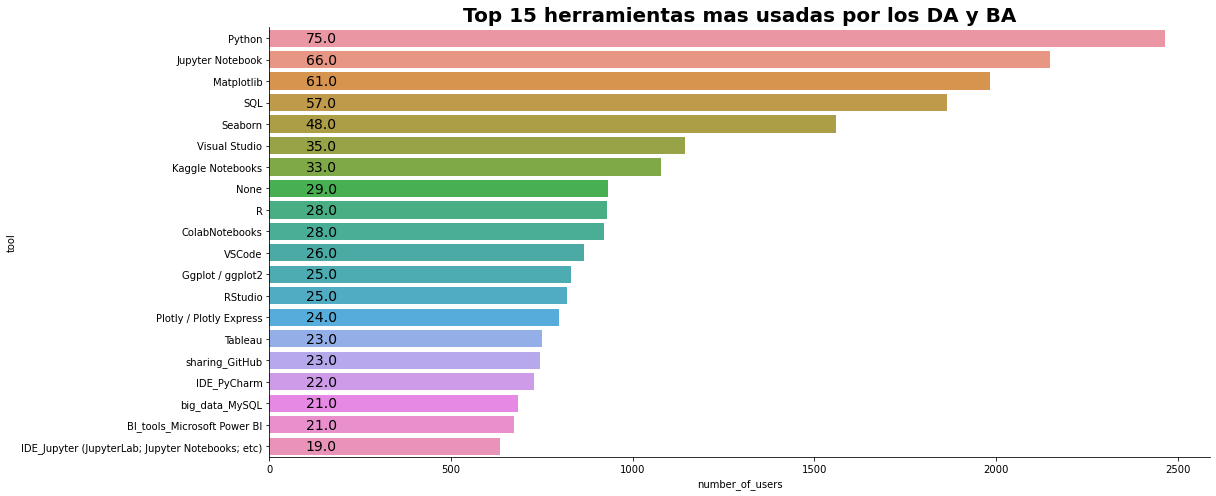

In [ ]:
plt.figure(figsize=(17, 7))

fig=sns.barplot(y = 'tool', x = 'number_of_users', data=df_sum, order= df_sum.sort_values('number_of_users', ascending= False)['tool'])

fig.set_title('Top 15 herramientas mas usadas por los DA y BA', fontsize = 20, fontweight = 'bold') 

fig.spines[["top", "right"]].set_visible(False)

# para poner etiquetas encima de las barras
for indice, valor in enumerate(df_sum["Percentage"]):
    plt.text(100, indice+0.2, valor,
             horizontalalignment='left', # para colocarlo en el centro de la barra
             fontsize= 14) 

plt.tight_layout()

plt.show()

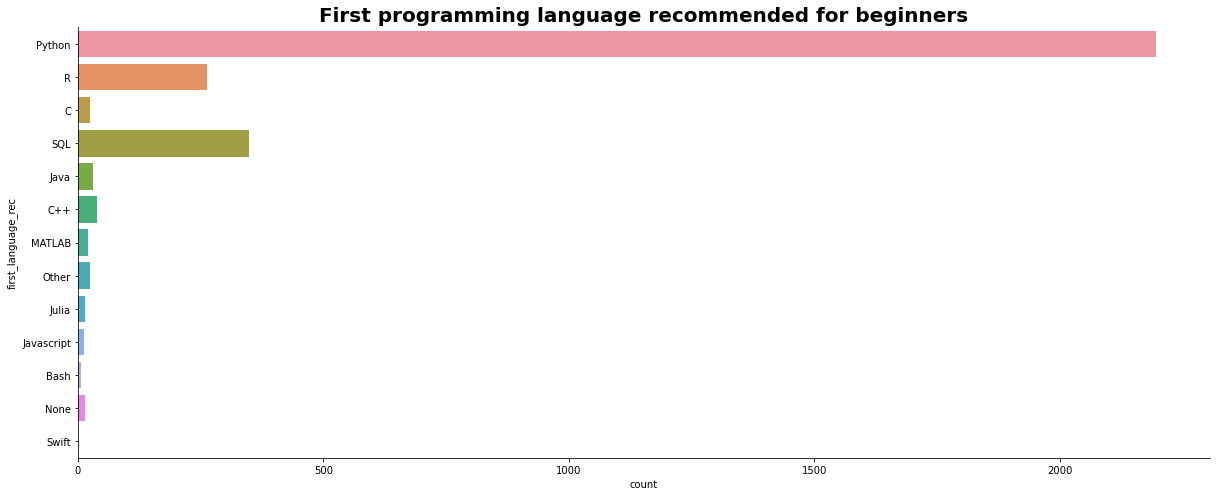

In [ ]:
plt.figure(figsize=(17, 7))

fig=sns.countplot(y = 'first_language_rec', data=df)

fig.set_title('First programming language recommended for beginners', fontsize = 20, fontweight = 'bold') 

fig.spines[["top", "right"]].set_visible(False)

# # para poner etiquetas encima de las barras
# for indice, valor in enumerate(df_sum["number_of_users"]):
#     plt.text(valor-150, indice+0.15, valor,
#              horizontalalignment='left', # para colocarlo en el centro de la barra
#              fontsize= 16) 


plt.tight_layout()

plt.show()

In [ ]:
df_rec_language = df.stb.freq(['first_language_rec'], thresh= 95)

df_rec_language 

,first_language_rec,count,percent,cumulative_count,cumulative_percent
0,Python,2195,73.337788,2195,73.337788
1,SQL,349,11.660541,2544,84.998329
2,R,263,8.787170,2807,93.785499
3,others,186,6.214501,2993,100.000000


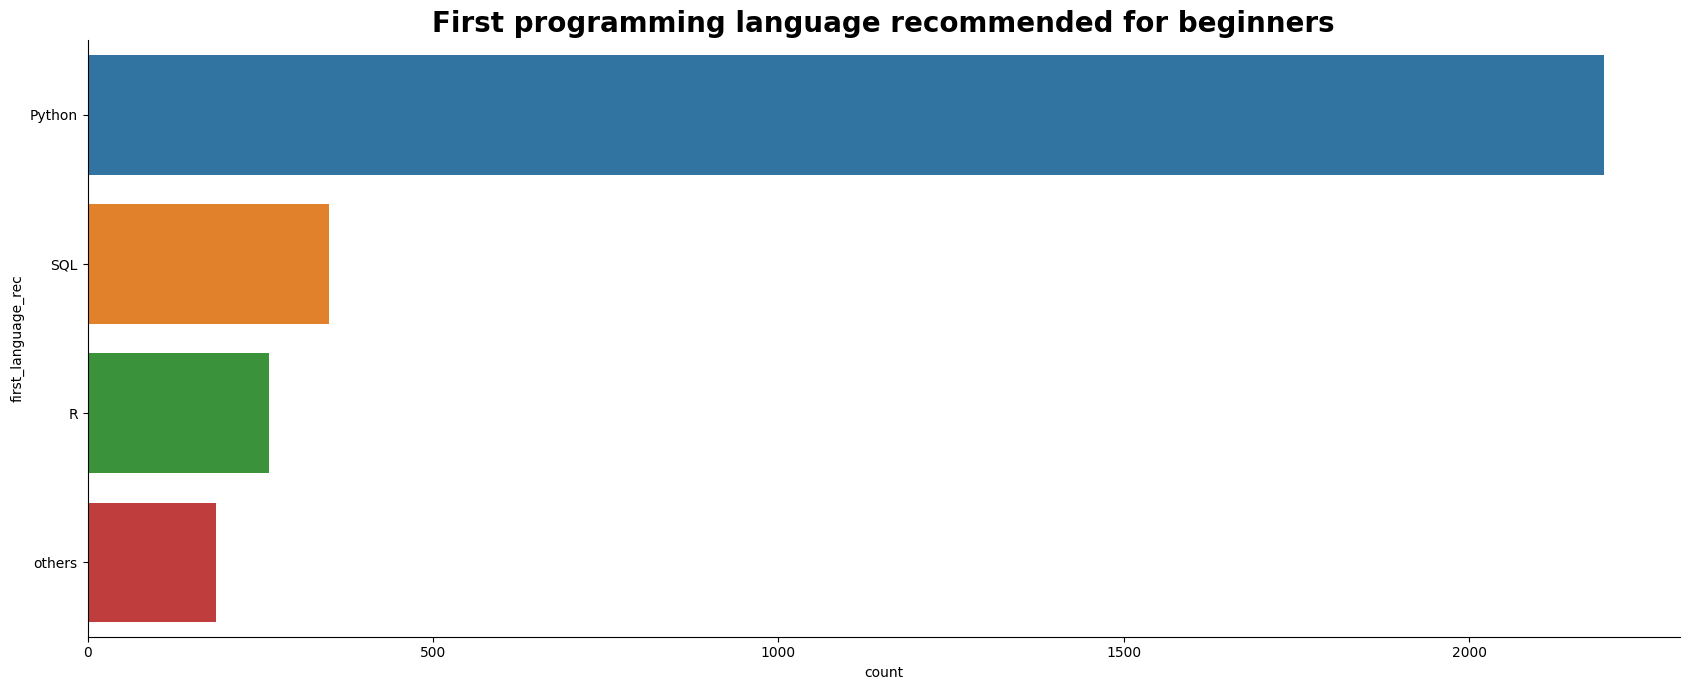

In [ ]:
plt.figure(figsize=(17, 7))

fig=sns.barplot(y = 'first_language_rec', x= "count", data=df_rec_language)

fig.set_title('First programming language recommended for beginners', fontsize = 20, fontweight = 'bold') 

fig.spines[["top", "right"]].set_visible(False)

# # para poner etiquetas encima de las barras
# for indice, valor in enumerate(df_sum["number_of_users"]):
#     plt.text(valor-150, indice+0.15, valor,
#              horizontalalignment='left', # para colocarlo en el centro de la barra
#              fontsize= 16) 


plt.tight_layout()

plt.show()

In [ ]:
df_rec_language['percent'] = round(df_rec_language['percent'], 1)

df_rec_language

,first_language_rec,count,percent,cumulative_count,cumulative_percent
0,Python,2195,73.3,2195,73.337788
1,SQL,349,11.7,2544,84.998329
2,R,263,8.8,2807,93.785499
3,others,186,6.2,2993,100.000000


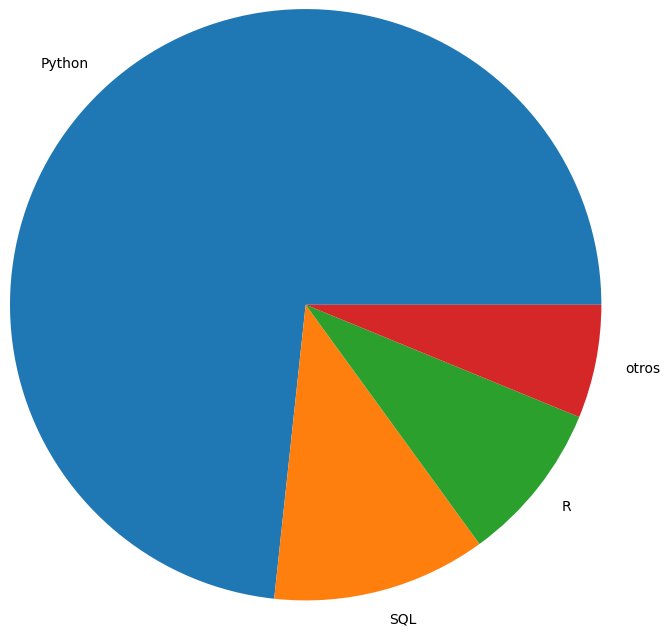

In [ ]:
plt.figure()
plt.pie(df_rec_language['percent'], labels = ["Python", "SQL", "R", "otros"], radius = 2)
plt.show()

In [45]:
df_sum

,tool,number_of_users,Percentage
27,Python,2465.0,75.0
40,Jupyter Notebook,2149.0,66.0
59,Matplotlib,1984.0,61.0
38,SQL,1866.0,57.0
57,Seaborn,1559.0,48.0
51,Visual Studio,1144.0,35.0
0,Kaggle Notebooks,1077.0,33.0
15,None,933.0,29.0
31,R,928.0,28.0
1,ColabNotebooks,920.0,28.0


In [62]:
condiciones = [(df['years_programming'] == 'I have never written code'), 
                ((df['years_programming'] == '< 1 years')|(df['years_programming'] == '1-3 years')), 
                ((df['years_programming'] == '3-5 years')| (df['years_programming'] == '5-10 years')|(df['years_programming'] == '10-20 years')|(df['years_programming'] == '20+ years'))]
categorias = ['Sin experiencia', 'Junior', 'Senior'] 

In [63]:
df['experiencia programacion'] = np.select(condiciones, categorias)

/var/folders/qs/lczv8kqx5w59ygqwfs1w0vlr0000gn/T/ipykernel_1567/2338383255.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['experiencia programacion'] = np.select(condiciones, categorias)


In [48]:
df

,age,gender,country,continent,job_title,size_DA_dept,years_programming,first_language_rec,primary_data_tool,ML,notebooks_KaggleNotebooks,notebooks_ColabNotebooks,notebooks_AzureNotebooks,notebooks_Paperspace/Gradient,notebooks_Binder/JupyterHub,notebooks_CodeOcean,notebooks_IBMWatsonStudio,notebooks_AmazonSagemakerStudioNotebooks,notebooks_AmazonEMRNotebooks,notebooks_GoogleCloudNotebooks(AIPlatform/VertexAI),notebooks_GoogleCloudDatalab,notebooks_DatabricksCollaborativeNotebooks,notebooks_Zeppelin/ZeplNotebooks,notebooks_DeepnoteNotebooks,notebooks_ObservableNotebooks,notebooks_None,notebooks_Other,sharing_PlotlyDash,sharing_Streamlit,sharing_NBViewer,sharing_GitHub,sharing_Personalblog,sharing_Kaggle,sharing_Colab,sharing_Shiny,sharing_does_not_share,sharing_Other,dev_language_Python,dev_language_MATLAB,dev_language_Javascript,dev_language_None,dev_language_R,dev_language_Julia,dev_language_C,dev_language_Bash,dev_language_Other,dev_language_Java,dev_language_C++,dev_language_SQL,dev_language_Swift,IDE_Jupyter Notebook,IDE_None,IDE_PyCharm,IDE_MATLAB,IDE_RStudio,IDE_Notepad++,IDE_Sublime Text,IDE_Other,IDE_Vim / Emacs,IDE_Spyder,IDE_Visual Studio Code (VSCode),IDE_Visual Studio,IDE_Jupyter (JupyterLab; Jupyter Notebooks; etc),visualisation_D3 js,visualisation_Bokeh,visualisation_None,visualisation_Shiny,visualisation_Seaborn,visualisation_Plotly / Plotly Express,visualisation_Matplotlib,visualisation_Ggplot / ggplot2,visualisation_Other,visualisation_Altair,visualisation_Geoplotlib,visualisation_Leaflet / Folium,activities_data_infrastructure,activities_ML_prototypes,activities_ML_research,activities_Other,activities_improve_ML,activities_analyze_data,activities_run_ML,activities_None,big_data_IBM Db2,big_data_Microsoft SQL Server,big_data_Google Cloud Spanner,big_data_Google Cloud BigTable,big_data_Microsoft Azure Cosmos DB,big_data_Google Cloud BigQuery,big_data_SQLite,big_data_PostgreSQL,big_data_Microsoft Azure SQL Database,big_data_Amazon DynamoDB,big_data_Other,big_data_Oracle Database,big_data_Google Cloud Firestore,big_data_MongoDB,big_data_None,big_data_Amazon RDS,big_data_MySQL,big_data_Amazon Redshift,big_data_Snowflake,big_data_Amazon Aurora,big_data_Google Cloud SQL,BI_tools_Google Data Studio,BI_tools_Qlik,BI_tools_None,BI_tools_Looker,BI_tools_Alteryx,BI_tools_Domo,BI_tools_Other,BI_tools_TIBCO Spotfire,BI_tools_Amazon QuickSight,BI_tools_SAP Analytics Cloud,BI_tools_Thoughtspot,BI_tools_Sisense,BI_tools_Salesforce,BI_tools_Tableau CRM,BI_tools_Microsoft Azure Synapse,BI_tools_Tableau,BI_tools_Microsoft Power BI,primary_tool_local_dev_env,primary_tool_adv_stats,primary_tool_basic_stats,primary_tool_BI,primary_tool_cloud_APIs,primary_tool_Other,first_language_rec_Python,first_language_rec_SQL,first_language_rec_R,first_language_rec_MATLAB,first_language_rec_C,first_language_rec_Julia,first_language_rec_Other,first_language_rec_C++,first_language_rec_Javascript,first_language_rec_Java,first_language_rec_None,first_language_rec_Bash,first_language_rec_Swift,experiencia programacion
16,50-54,Man,Belgium,Europe,Data Analyst,5-9,20+ years,Python,"Local development environments (RStudio, Jupyt...",1-2 years,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Senior
32,22-24,Nonbinary,United States of America,America,Data Analyst,3-4,< 1 years,R,NaN,I do not use machine learning methods,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0

In [70]:
df_perfiles = df.iloc[:, 10 :]

In [71]:
df_perfiles 

,notebooks_KaggleNotebooks,notebooks_ColabNotebooks,notebooks_AzureNotebooks,notebooks_Paperspace/Gradient,notebooks_Binder/JupyterHub,notebooks_CodeOcean,notebooks_IBMWatsonStudio,notebooks_AmazonSagemakerStudioNotebooks,notebooks_AmazonEMRNotebooks,notebooks_GoogleCloudNotebooks(AIPlatform/VertexAI),notebooks_GoogleCloudDatalab,notebooks_DatabricksCollaborativeNotebooks,notebooks_Zeppelin/ZeplNotebooks,notebooks_DeepnoteNotebooks,notebooks_ObservableNotebooks,notebooks_None,notebooks_Other,sharing_PlotlyDash,sharing_Streamlit,sharing_NBViewer,sharing_GitHub,sharing_Personalblog,sharing_Kaggle,sharing_Colab,sharing_Shiny,sharing_does_not_share,sharing_Other,dev_language_Python,dev_language_MATLAB,dev_language_Javascript,dev_language_None,dev_language_R,dev_language_Julia,dev_language_C,dev_language_Bash,dev_language_Other,dev_language_Java,dev_language_C++,dev_language_SQL,dev_language_Swift,IDE_Jupyter Notebook,IDE_None,IDE_PyCharm,IDE_MATLAB,IDE_RStudio,IDE_Notepad++,IDE_Sublime Text,IDE_Other,IDE_Vim / Emacs,IDE_Spyder,IDE_Visual Studio Code (VSCode),IDE_Visual Studio,IDE_Jupyter (JupyterLab; Jupyter Notebooks; etc),visualisation_D3 js,visualisation_Bokeh,visualisation_None,visualisation_Shiny,visualisation_Seaborn,visualisation_Plotly / Plotly Express,visualisation_Matplotlib,visualisation_Ggplot / ggplot2,visualisation_Other,visualisation_Altair,visualisation_Geoplotlib,visualisation_Leaflet / Folium,activities_data_infrastructure,activities_ML_prototypes,activities_ML_research,activities_Other,activities_improve_ML,activities_analyze_data,activities_run_ML,activities_None,big_data_IBM Db2,big_data_Microsoft SQL Server,big_data_Google Cloud Spanner,big_data_Google Cloud BigTable,big_data_Microsoft Azure Cosmos DB,big_data_Google Cloud BigQuery,big_data_SQLite,big_data_PostgreSQL,big_data_Microsoft Azure SQL Database,big_data_Amazon DynamoDB,big_data_Other,big_data_Oracle Database,big_data_Google Cloud Firestore,big_data_MongoDB,big_data_None,big_data_Amazon RDS,big_data_MySQL,big_data_Amazon Redshift,big_data_Snowflake,big_data_Amazon Aurora,big_data_Google Cloud SQL,BI_tools_Google Data Studio,BI_tools_Qlik,BI_tools_None,BI_tools_Looker,BI_tools_Alteryx,BI_tools_Domo,BI_tools_Other,BI_tools_TIBCO Spotfire,BI_tools_Amazon QuickSight,BI_tools_SAP Analytics Cloud,BI_tools_Thoughtspot,BI_tools_Sisense,BI_tools_Salesforce,BI_tools_Tableau CRM,BI_tools_Microsoft Azure Synapse,BI_tools_Tableau,BI_tools_Microsoft Power BI,primary_tool_local_dev_env,primary_tool_adv_stats,primary_tool_basic_stats,primary_tool_BI,primary_tool_cloud_APIs,primary_tool_Other,first_language_rec_Python,first_language_rec_SQL,first_language_rec_R,first_language_rec_MATLAB,first_language_rec_C,first_language_rec_Julia,first_language_rec_Other,first_language_rec_C++,first_language_rec_Javascript,first_language_rec_Java,first_language_rec_None,first_language_rec_Bash,first_language_rec_Swift,experiencia programacion
16,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Senior
32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Junior

In [72]:
df_perfiles = df_perfiles.drop(columns = ['primary_tool_local_dev_env', 
                            'primary_tool_adv_stats', 
                            'primary_tool_basic_stats', 
                            'primary_tool_BI', 
                            'primary_tool_cloud_APIs', 
                            'primary_tool_Other', 
                            'first_language_rec_Python', 
                            'first_language_rec_SQL', 
                            'first_language_rec_R', 
                            'first_language_rec_MATLAB', 
                            'first_language_rec_C', 
                            'first_language_rec_Julia', 
                            'first_language_rec_Other', 
                            'first_language_rec_C++', 
                            'first_language_rec_Javascript', 
                            'first_language_rec_Java', 
                            'first_language_rec_None', 
                            'first_language_rec_Bash', 
                            'first_language_rec_Swift', 
                            'activities_data_infrastructure', 
                            'activities_ML_prototypes', 
                            'activities_ML_research', 
                            'activities_Other', 
                            'activities_improve_ML', 
                            'activities_analyze_data', 
                            'activities_run_ML', 
                            'activities_None',], axis = 1)

In [73]:
df_perfiles

,notebooks_KaggleNotebooks,notebooks_ColabNotebooks,notebooks_AzureNotebooks,notebooks_Paperspace/Gradient,notebooks_Binder/JupyterHub,notebooks_CodeOcean,notebooks_IBMWatsonStudio,notebooks_AmazonSagemakerStudioNotebooks,notebooks_AmazonEMRNotebooks,notebooks_GoogleCloudNotebooks(AIPlatform/VertexAI),notebooks_GoogleCloudDatalab,notebooks_DatabricksCollaborativeNotebooks,notebooks_Zeppelin/ZeplNotebooks,notebooks_DeepnoteNotebooks,notebooks_ObservableNotebooks,notebooks_None,notebooks_Other,sharing_PlotlyDash,sharing_Streamlit,sharing_NBViewer,sharing_GitHub,sharing_Personalblog,sharing_Kaggle,sharing_Colab,sharing_Shiny,sharing_does_not_share,sharing_Other,dev_language_Python,dev_language_MATLAB,dev_language_Javascript,dev_language_None,dev_language_R,dev_language_Julia,dev_language_C,dev_language_Bash,dev_language_Other,dev_language_Java,dev_language_C++,dev_language_SQL,dev_language_Swift,IDE_Jupyter Notebook,IDE_None,IDE_PyCharm,IDE_MATLAB,IDE_RStudio,IDE_Notepad++,IDE_Sublime Text,IDE_Other,IDE_Vim / Emacs,IDE_Spyder,IDE_Visual Studio Code (VSCode),IDE_Visual Studio,IDE_Jupyter (JupyterLab; Jupyter Notebooks; etc),visualisation_D3 js,visualisation_Bokeh,visualisation_None,visualisation_Shiny,visualisation_Seaborn,visualisation_Plotly / Plotly Express,visualisation_Matplotlib,visualisation_Ggplot / ggplot2,visualisation_Other,visualisation_Altair,visualisation_Geoplotlib,visualisation_Leaflet / Folium,big_data_IBM Db2,big_data_Microsoft SQL Server,big_data_Google Cloud Spanner,big_data_Google Cloud BigTable,big_data_Microsoft Azure Cosmos DB,big_data_Google Cloud BigQuery,big_data_SQLite,big_data_PostgreSQL,big_data_Microsoft Azure SQL Database,big_data_Amazon DynamoDB,big_data_Other,big_data_Oracle Database,big_data_Google Cloud Firestore,big_data_MongoDB,big_data_None,big_data_Amazon RDS,big_data_MySQL,big_data_Amazon Redshift,big_data_Snowflake,big_data_Amazon Aurora,big_data_Google Cloud SQL,BI_tools_Google Data Studio,BI_tools_Qlik,BI_tools_None,BI_tools_Looker,BI_tools_Alteryx,BI_tools_Domo,BI_tools_Other,BI_tools_TIBCO Spotfire,BI_tools_Amazon QuickSight,BI_tools_SAP Analytics Cloud,BI_tools_Thoughtspot,BI_tools_Sisense,BI_tools_Salesforce,BI_tools_Tableau CRM,BI_tools_Microsoft Azure Synapse,BI_tools_Tableau,BI_tools_Microsoft Power BI,experiencia programacion
16,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Senior
32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Junior
33,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Senior
46,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Junio

In [74]:
df_senior = df_perfiles[df_perfiles['experiencia programacion'] == 'Senior']

df_senior

,notebooks_KaggleNotebooks,notebooks_ColabNotebooks,notebooks_AzureNotebooks,notebooks_Paperspace/Gradient,notebooks_Binder/JupyterHub,notebooks_CodeOcean,notebooks_IBMWatsonStudio,notebooks_AmazonSagemakerStudioNotebooks,notebooks_AmazonEMRNotebooks,notebooks_GoogleCloudNotebooks(AIPlatform/VertexAI),notebooks_GoogleCloudDatalab,notebooks_DatabricksCollaborativeNotebooks,notebooks_Zeppelin/ZeplNotebooks,notebooks_DeepnoteNotebooks,notebooks_ObservableNotebooks,notebooks_None,notebooks_Other,sharing_PlotlyDash,sharing_Streamlit,sharing_NBViewer,sharing_GitHub,sharing_Personalblog,sharing_Kaggle,sharing_Colab,sharing_Shiny,sharing_does_not_share,sharing_Other,dev_language_Python,dev_language_MATLAB,dev_language_Javascript,dev_language_None,dev_language_R,dev_language_Julia,dev_language_C,dev_language_Bash,dev_language_Other,dev_language_Java,dev_language_C++,dev_language_SQL,dev_language_Swift,IDE_Jupyter Notebook,IDE_None,IDE_PyCharm,IDE_MATLAB,IDE_RStudio,IDE_Notepad++,IDE_Sublime Text,IDE_Other,IDE_Vim / Emacs,IDE_Spyder,IDE_Visual Studio Code (VSCode),IDE_Visual Studio,IDE_Jupyter (JupyterLab; Jupyter Notebooks; etc),visualisation_D3 js,visualisation_Bokeh,visualisation_None,visualisation_Shiny,visualisation_Seaborn,visualisation_Plotly / Plotly Express,visualisation_Matplotlib,visualisation_Ggplot / ggplot2,visualisation_Other,visualisation_Altair,visualisation_Geoplotlib,visualisation_Leaflet / Folium,big_data_IBM Db2,big_data_Microsoft SQL Server,big_data_Google Cloud Spanner,big_data_Google Cloud BigTable,big_data_Microsoft Azure Cosmos DB,big_data_Google Cloud BigQuery,big_data_SQLite,big_data_PostgreSQL,big_data_Microsoft Azure SQL Database,big_data_Amazon DynamoDB,big_data_Other,big_data_Oracle Database,big_data_Google Cloud Firestore,big_data_MongoDB,big_data_None,big_data_Amazon RDS,big_data_MySQL,big_data_Amazon Redshift,big_data_Snowflake,big_data_Amazon Aurora,big_data_Google Cloud SQL,BI_tools_Google Data Studio,BI_tools_Qlik,BI_tools_None,BI_tools_Looker,BI_tools_Alteryx,BI_tools_Domo,BI_tools_Other,BI_tools_TIBCO Spotfire,BI_tools_Amazon QuickSight,BI_tools_SAP Analytics Cloud,BI_tools_Thoughtspot,BI_tools_Sisense,BI_tools_Salesforce,BI_tools_Tableau CRM,BI_tools_Microsoft Azure Synapse,BI_tools_Tableau,BI_tools_Microsoft Power BI,experiencia programacion
16,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Senior
33,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Senior
150,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Senior
167,1.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Sen

In [75]:
df_junior = df_perfiles[df_perfiles['experiencia programacion'] == 'Junior']

df_junior

,notebooks_KaggleNotebooks,notebooks_ColabNotebooks,notebooks_AzureNotebooks,notebooks_Paperspace/Gradient,notebooks_Binder/JupyterHub,notebooks_CodeOcean,notebooks_IBMWatsonStudio,notebooks_AmazonSagemakerStudioNotebooks,notebooks_AmazonEMRNotebooks,notebooks_GoogleCloudNotebooks(AIPlatform/VertexAI),notebooks_GoogleCloudDatalab,notebooks_DatabricksCollaborativeNotebooks,notebooks_Zeppelin/ZeplNotebooks,notebooks_DeepnoteNotebooks,notebooks_ObservableNotebooks,notebooks_None,notebooks_Other,sharing_PlotlyDash,sharing_Streamlit,sharing_NBViewer,sharing_GitHub,sharing_Personalblog,sharing_Kaggle,sharing_Colab,sharing_Shiny,sharing_does_not_share,sharing_Other,dev_language_Python,dev_language_MATLAB,dev_language_Javascript,dev_language_None,dev_language_R,dev_language_Julia,dev_language_C,dev_language_Bash,dev_language_Other,dev_language_Java,dev_language_C++,dev_language_SQL,dev_language_Swift,IDE_Jupyter Notebook,IDE_None,IDE_PyCharm,IDE_MATLAB,IDE_RStudio,IDE_Notepad++,IDE_Sublime Text,IDE_Other,IDE_Vim / Emacs,IDE_Spyder,IDE_Visual Studio Code (VSCode),IDE_Visual Studio,IDE_Jupyter (JupyterLab; Jupyter Notebooks; etc),visualisation_D3 js,visualisation_Bokeh,visualisation_None,visualisation_Shiny,visualisation_Seaborn,visualisation_Plotly / Plotly Express,visualisation_Matplotlib,visualisation_Ggplot / ggplot2,visualisation_Other,visualisation_Altair,visualisation_Geoplotlib,visualisation_Leaflet / Folium,big_data_IBM Db2,big_data_Microsoft SQL Server,big_data_Google Cloud Spanner,big_data_Google Cloud BigTable,big_data_Microsoft Azure Cosmos DB,big_data_Google Cloud BigQuery,big_data_SQLite,big_data_PostgreSQL,big_data_Microsoft Azure SQL Database,big_data_Amazon DynamoDB,big_data_Other,big_data_Oracle Database,big_data_Google Cloud Firestore,big_data_MongoDB,big_data_None,big_data_Amazon RDS,big_data_MySQL,big_data_Amazon Redshift,big_data_Snowflake,big_data_Amazon Aurora,big_data_Google Cloud SQL,BI_tools_Google Data Studio,BI_tools_Qlik,BI_tools_None,BI_tools_Looker,BI_tools_Alteryx,BI_tools_Domo,BI_tools_Other,BI_tools_TIBCO Spotfire,BI_tools_Amazon QuickSight,BI_tools_SAP Analytics Cloud,BI_tools_Thoughtspot,BI_tools_Sisense,BI_tools_Salesforce,BI_tools_Tableau CRM,BI_tools_Microsoft Azure Synapse,BI_tools_Tableau,BI_tools_Microsoft Power BI,experiencia programacion
32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Junior
46,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Junior
52,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,Junior
53,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Junio

In [86]:
df_sum_senior = df_senior.select_dtypes(include=np.number).sum().reset_index()
df_sum_senior.columns = ['tool', 'number_of_users']
df_sum_senior = df_sum_senior.sort_values(by='number_of_users', ascending=False).head(10)

In [90]:
df_sum_senior['perfil'] = 'Senior'

In [99]:
df_sum_senior['Percentage'] = df_sum_senior['number_of_users'] / df_sum_senior['number_of_users'].sum() * 100

df_sum_senior

,tool,number_of_users,perfil,Percentage
27,dev_language_Python,884.0,Senior,15.299412
40,IDE_Jupyter Notebook,794.0,Senior,13.741779
38,dev_language_SQL,791.0,Senior,13.689858
59,visualisation_Matplotlib,731.0,Senior,12.651436
57,visualisation_Seaborn,586.0,Senior,10.141918
51,IDE_Visual Studio,454.0,Senior,7.857390
0,notebooks_KaggleNotebooks,399.0,Senior,6.905504
31,dev_language_R,392.0,Senior,6.784354
15,notebooks_None,383.0,Senior,6.628591
60,visualisation_Ggplot / ggplot2,364.0,Senior,6.299758


In [88]:
df_sum_junior = df_junior.select_dtypes(include=np.number).sum().reset_index()
df_sum_junior.columns = ['tool', 'number_of_users']
df_sum_junior = df_sum_junior.sort_values(by='number_of_users', ascending=False).head(10)

In [100]:
df_sum_junior['Percentage'] = df_sum_junior['number_of_users'] / df_sum_junior['number_of_users'].sum() * 100

df_sum_senior

,tool,number_of_users,perfil,Percentage
27,dev_language_Python,884.0,Senior,15.299412
40,IDE_Jupyter Notebook,794.0,Senior,13.741779
38,dev_language_SQL,791.0,Senior,13.689858
59,visualisation_Matplotlib,731.0,Senior,12.651436
57,visualisation_Seaborn,586.0,Senior,10.141918
51,IDE_Visual Studio,454.0,Senior,7.857390
0,notebooks_KaggleNotebooks,399.0,Senior,6.905504
31,dev_language_R,392.0,Senior,6.784354
15,notebooks_None,383.0,Senior,6.628591
60,visualisation_Ggplot / ggplot2,364.0,Senior,6.299758


In [91]:
df_sum_junior['perfil'] = 'Junior'

In [101]:
df_sum_perfil = pd.concat([df_sum_junior, df_sum_senior], axis=0)

df_sum_perfil.sort_values(by='number_of_users', ascending=False)

,tool,number_of_users,perfil,Percentage
27,dev_language_Python,1581.0,Junior,17.045822
40,IDE_Jupyter Notebook,1355.0,Junior,14.609164
59,visualisation_Matplotlib,1253.0,Junior,13.509434
38,dev_language_SQL,1075.0,Junior,11.590296
57,visualisation_Seaborn,973.0,Junior,10.490566
27,dev_language_Python,884.0,Senior,15.299412
40,IDE_Jupyter Notebook,794.0,Senior,13.741779
38,dev_language_SQL,791.0,Senior,13.689858
59,visualisation_Matplotlib,731.0,Senior,12.651436
51,IDE_Visual Studio,690.0,Junior,7.439353


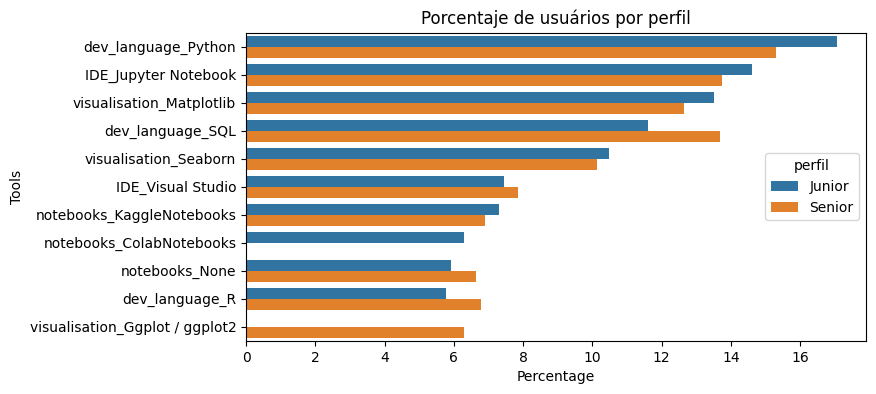

In [102]:
# iniciamos la figura con un tamaño especifico
plt.figure(figsize =(8,4))

# iniciamos nuestra gráfica para contestar a la pregunta, añadiendo sex al parámetro hue
fig = sns.barplot(x='Percentage', y = 'tool', hue = "perfil", data = df_sum_perfil)

# cambiamos el nombre de los ejes
fig.set(xlabel='Percentage', ylabel= 'Tools')

# cambiamos el título de la gráfica
fig.set_title('Porcentaje de usuários por perfil')

# motramos la gráfica
plt.show()

In [104]:
df_continentes = df.groupby('continent').sum()

df_continentes

/var/folders/qs/lczv8kqx5w59ygqwfs1w0vlr0000gn/T/ipykernel_1567/972965517.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_continentes = df.groupby('continent').sum()


,notebooks_KaggleNotebooks,notebooks_ColabNotebooks,notebooks_AzureNotebooks,notebooks_Paperspace/Gradient,notebooks_Binder/JupyterHub,notebooks_CodeOcean,notebooks_IBMWatsonStudio,notebooks_AmazonSagemakerStudioNotebooks,notebooks_AmazonEMRNotebooks,notebooks_GoogleCloudNotebooks(AIPlatform/VertexAI),notebooks_GoogleCloudDatalab,notebooks_DatabricksCollaborativeNotebooks,notebooks_Zeppelin/ZeplNotebooks,notebooks_DeepnoteNotebooks,notebooks_ObservableNotebooks,notebooks_None,notebooks_Other,sharing_PlotlyDash,sharing_Streamlit,sharing_NBViewer,sharing_GitHub,sharing_Personalblog,sharing_Kaggle,sharing_Colab,sharing_Shiny,sharing_does_not_share,sharing_Other,dev_language_Python,dev_language_MATLAB,dev_language_Javascript,dev_language_None,dev_language_R,dev_language_Julia,dev_language_C,dev_language_Bash,dev_language_Other,dev_language_Java,dev_language_C++,dev_language_SQL,dev_language_Swift,IDE_Jupyter Notebook,IDE_None,IDE_PyCharm,IDE_MATLAB,IDE_RStudio,IDE_Notepad++,IDE_Sublime Text,IDE_Other,IDE_Vim / Emacs,IDE_Spyder,IDE_Visual Studio Code (VSCode),IDE_Visual Studio,IDE_Jupyter (JupyterLab; Jupyter Notebooks; etc),visualisation_D3 js,visualisation_Bokeh,visualisation_None,visualisation_Shiny,visualisation_Seaborn,visualisation_Plotly / Plotly Express,visualisation_Matplotlib,visualisation_Ggplot / ggplot2,visualisation_Other,visualisation_Altair,visualisation_Geoplotlib,visualisation_Leaflet / Folium,activities_data_infrastructure,activities_ML_prototypes,activities_ML_research,activities_Other,activities_improve_ML,activities_analyze_data,activities_run_ML,activities_None,big_data_IBM Db2,big_data_Microsoft SQL Server,big_data_Google Cloud Spanner,big_data_Google Cloud BigTable,big_data_Microsoft Azure Cosmos DB,big_data_Google Cloud BigQuery,big_data_SQLite,big_data_PostgreSQL,big_data_Microsoft Azure SQL Database,big_data_Amazon DynamoDB,big_data_Other,big_data_Oracle Database,big_data_Google Cloud Firestore,big_data_MongoDB,big_data_None,big_data_Amazon RDS,big_data_MySQL,big_data_Amazon Redshift,big_data_Snowflake,big_data_Amazon Aurora,big_data_Google Cloud SQL,BI_tools_Google Data Studio,BI_tools_Qlik,BI_tools_None,BI_tools_Looker,BI_tools_Alteryx,BI_tools_Domo,BI_tools_Other,BI_tools_TIBCO Spotfire,BI_tools_Amazon QuickSight,BI_tools_SAP Analytics Cloud,BI_tools_Thoughtspot,BI_tools_Sisense,BI_tools_Salesforce,BI_tools_Tableau CRM,BI_tools_Microsoft Azure Synapse,BI_tools_Tableau,BI_tools_Microsoft Power BI,primary_tool_local_dev_env,primary_tool_adv_stats,primary_tool_basic_stats,primary_tool_BI,primary_tool_cloud_APIs,primary_tool_Other,first_language_rec_Python,first_language_rec_SQL,first_language_rec_R,first_language_rec_MATLAB,first_language_rec_C,first_language_rec_Julia,first_language_rec_Other,first_language_rec_C++,first_language_rec_Javascript,first_language_rec_Java,first_language_rec_None,first_language_rec_Bash,first_language_rec_Swift
continent,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Africa,128.0,67.0,19.0,2.0,22.0,4.0,24.0,5.0,4.0,29.0,34.0,6.0,1.0,2.0,5.0,72.0,10.0,5.0,6.0,3.0,77.0,15.0,68.0,21.0,4.0,55.0,3.0,234.0,33.0,40.0,5.0,82.0,0.0,43.0,7.0,20.0,60.0,38.0,163.0,2.0,205.0,6.0,85.0,27.0,70.0,39.0,33.0,13.0,4.0,48.0,90.0,123.0,57.0,8.0,14.0,47.0,13.0,137.0,55.0,190.0,64.0,13.0,4.0,15.0,9.0,67.0,30.0,27.0,9.0,22.0,234.0,28.0,41.0,10.0,43.0,6.0,8.0,9.0,21.0,23.0,38.0,17.0,6.0,2.0,22.0,10.0,19.0,37.0,4.0,73.0,7.0,3.0,5.0,20.0,20.0,5.0,47.0,4.0,5.0,3.0,5.0,4.0,5.0,11.0,2.0,3.0,5.0,11.0,5.0,72.0,80.0,53.0,24.0,149.0,18.0,2.0,8.0,213.0,34.0,24.0,2.0,8.0,0.0,2.0,6.0,4.0,7.0,0.0,0.0,0.0
America,198.0,199.0,44.0,6.0,41.0,7.0,34.0,19.0,14.0,48.0,59.0,31.0,5.0,11.0,9.0,234.0,22.0,15.0,9.0,8.0,170.0,29.0,110.0,66.0,21.0,163.0,14.0,517.0,47.0,92.0,16.0,282.0,10.0,50.0,42.0,89.0,114.0,33.0,466.0,6.0,458.0,31.0,120.0,26.0,267.0,133.0,62.0,30.0,26.0,109.0,204.0,260.0,139.0,28.0,33.0,106.0,96.0,309.0,211.0,402.0,255.0,24.

In [130]:
df_sum_continentes = df_continentes.filter(list_sum).T

df_sum_continentes

continent,Africa,America,Asia,Europe,Oceania,Other
dev_language_Python,234.0,517.0,1243.0,304.0,35.0,132.0
IDE_Jupyter Notebook,205.0,458.0,1073.0,270.0,29.0,114.0
visualisation_Matplotlib,190.0,402.0,1018.0,239.0,26.0,109.0
dev_language_SQL,163.0,466.0,845.0,260.0,29.0,103.0
visualisation_Seaborn,137.0,309.0,800.0,204.0,19.0,90.0
IDE_Visual Studio,123.0,260.0,554.0,126.0,15.0,66.0
notebooks_KaggleNotebooks,128.0,198.0,562.0,127.0,6.0,56.0
notebooks_None,72.0,234.0,355.0,169.0,32.0,71.0
dev_language_R,82.0,282.0,353.0,134.0,16.0,61.0
notebooks_ColabNotebooks,67.0,199.0,501.0,101.0,6.0,46.0


In [131]:
df_sum_continentes['total'] = df_sum_continentes['Africa'] + df_sum_continentes['America'] + df_sum_continentes['Asia'] + df_sum_continentes['Europe'] + df_sum_continentes['Oceania'] + df_sum_continentes['Other'] 

df_sum_continentes = df_sum_continentes.head(10)




In [132]:
df_sum_continentes.rename(columns = {'continent': 'tools'}, inplace= True)

/var/folders/qs/lczv8kqx5w59ygqwfs1w0vlr0000gn/T/ipykernel_1567/3785443866.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sum_continentes.rename(columns = {'continent': 'tools'}, inplace= True)


In [142]:
# df_sum_continentes = df_sum_continentes.T

df_sum_continentes = df_sum_continentes.T

df_sum_continentes = df_sum_continentes.reset_index()

df_sum_continentes

,index,0,1,2,3,4,5,6
0,continent,Africa,America,Asia,Europe,Oceania,Other,total
1,dev_language_Python,234.0,517.0,1243.0,304.0,35.0,132.0,2465.0
2,IDE_Jupyter Notebook,205.0,458.0,1073.0,270.0,29.0,114.0,2149.0
3,visualisation_Matplotlib,190.0,402.0,1018.0,239.0,26.0,109.0,1984.0
4,dev_language_SQL,163.0,466.0,845.0,260.0,29.0,103.0,1866.0
5,visualisation_Seaborn,137.0,309.0,800.0,204.0,19.0,90.0,1559.0
6,IDE_Visual Studio,123.0,260.0,554.0,126.0,15.0,66.0,1144.0
7,notebooks_KaggleNotebooks,128.0,198.0,562.0,127.0,6.0,56.0,1077.0
8,notebooks_None,72.0,234.0,355.0,169.0,32.0,71.0,933.0
9,dev_language_R,82.0,282.0,353.0,134.0,16.0,61.0,928.0


In [144]:
# iniciamos la figura con un tamaño especifico
plt.figure(figsize =(8,4))

# iniciamos nuestra gráfica para contestar a la pregunta, añadiendo sex al parámetro hue
fig = sns.barplot(x = 'index', data = df_sum_continentes)

# cambiamos el nombre de los ejes
fig.set(xlabel='Percentage', ylabel= 'Continente')

# cambiamos el título de la gráfica
fig.set_title('Porcentaje de usuários por perfil')

# motramos la gráfica
plt.show()

TypeError: Horizontal orientation requires numeric `x` variable.

<Figure size 800x400 with 0 Axes>